## Final Project Submission

Please fill out:
* Student name: Allie Kelly
* Student pace: part time
* Scheduled project review date/time: Thursday, June 20 at 1 PM
* Instructor name: Victor Geislinger
* Blog post URL: https://medium.com/@allisonkelly42/exploratory-data-analysis-with-the-king-county-housing-data-c6d3f7eadc57


 ## Define problem and import all necessary packages and data

### Objective

* Stakeholders: Contractors who flip houses to turn a profit
* Business Problem: Identify factors that affect housing prices
    * Factors that indicate lower initial purchase price
    * Factors that can be introduced to increase selling price and profit
    * Threshold for the most earning potential

### Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
original_df = pd.read_csv('kc_house_data.csv') #preserved for later investigation
df = pd.read_csv('kc_house_data.csv') #separated to clean/explore
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


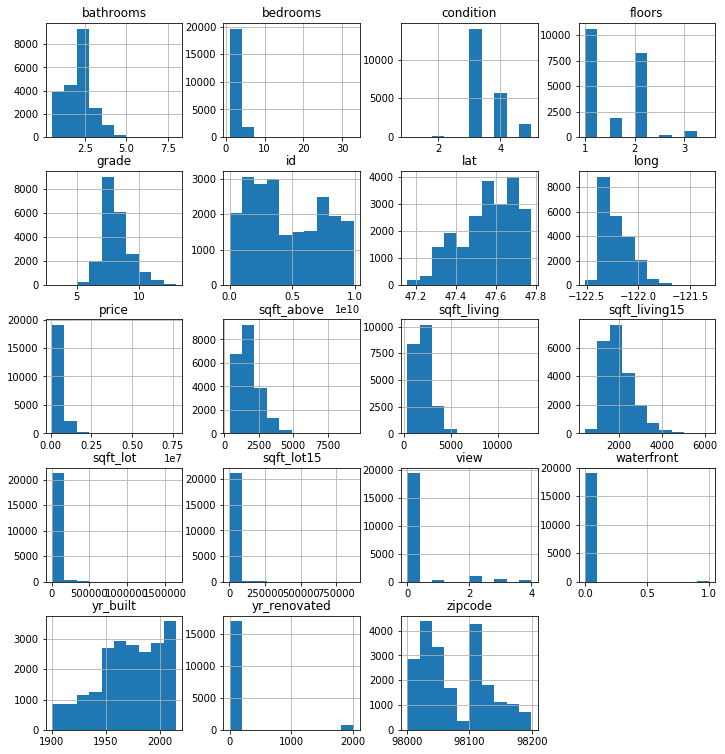

In [5]:
df.hist(figsize=(12,13)); #Get histograms to explore distributions of variables

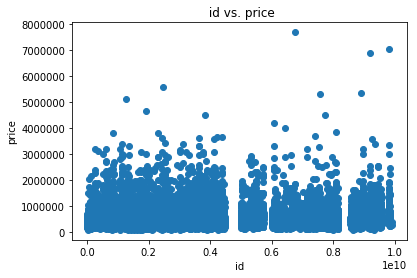

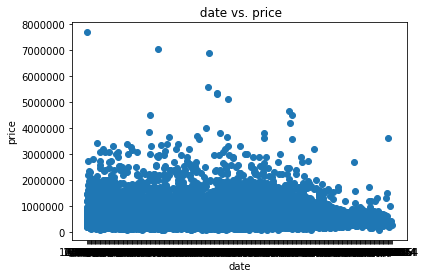

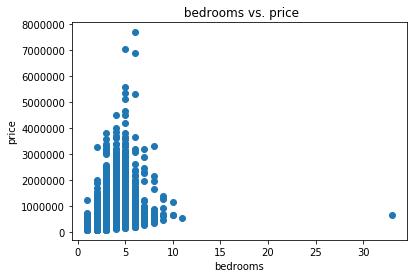

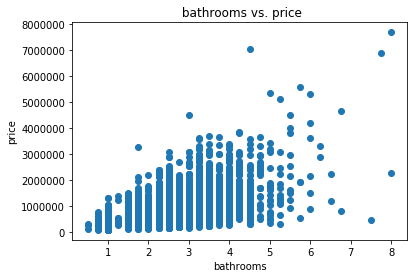

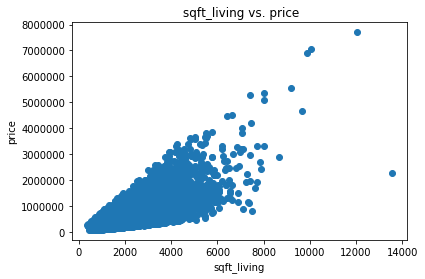

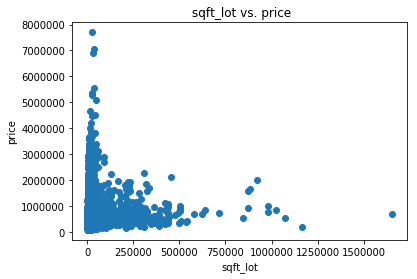

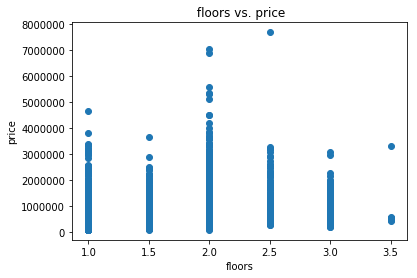

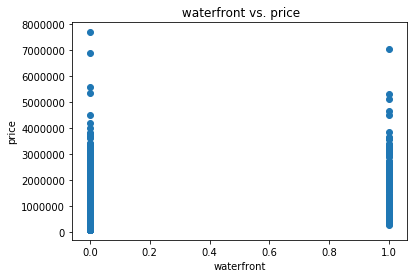

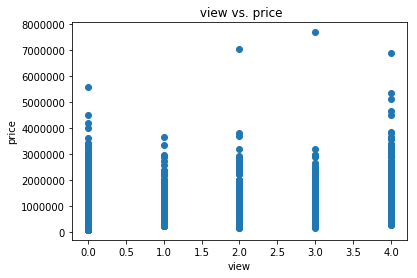

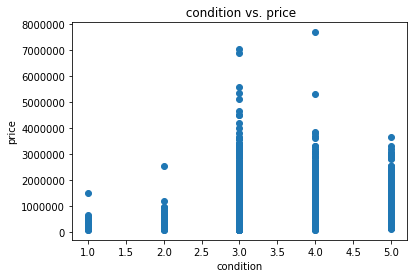

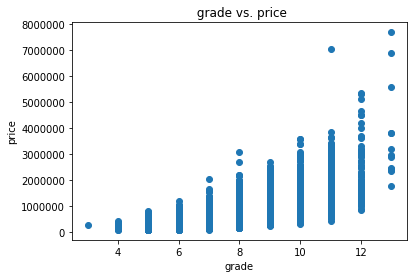

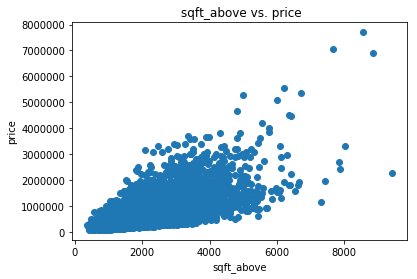

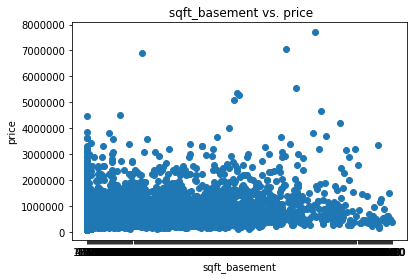

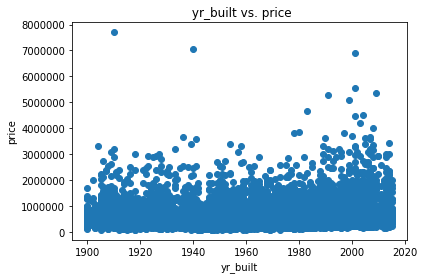

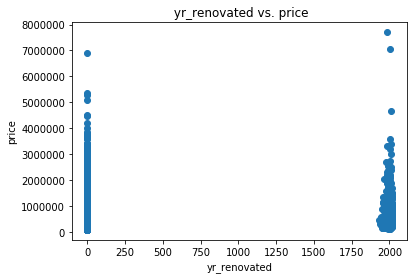

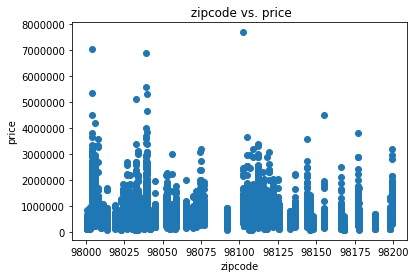

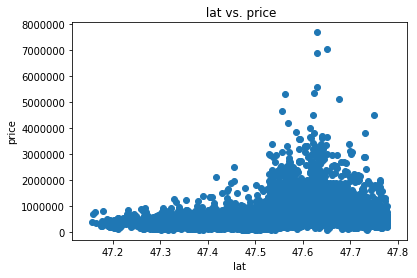

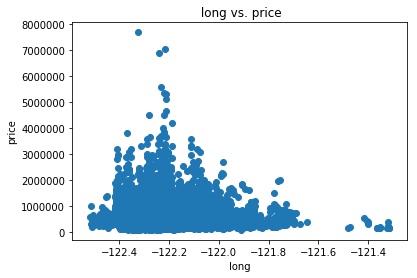

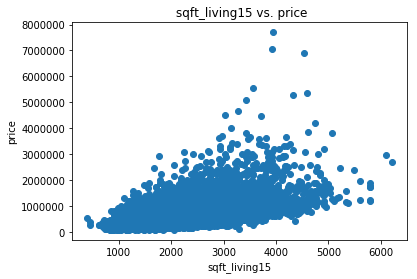

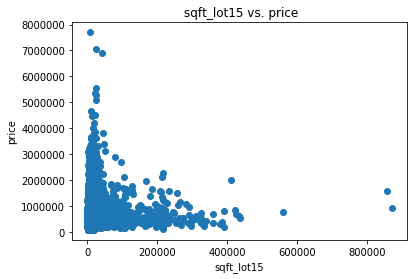

In [6]:
x_cols = df.drop('price', axis=1) #Exploring features versus target
for col in x_cols.columns:
    plt.scatter(df[col], df['price'])
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(f' {col} vs. price')
    plt.show();

### Observations
#### Data Types

A few things stuck out to me first, namely that the bedroom max value is 33, which is almost an unbelieveable number and may have been intended to be just 3. When I clean the data, I may substitute for the mean/mode value to mitigate any disruption due to such an extreme outlier. 

I also noticed that the basement square-footage values are strings instead of floats, which will need to be changed. 

Year renovated, View, and Waterfront all have null values in them which will need to be investigated. 

Also, the zipcode series is an integer, but should be a string as zipcodes are immutable and should not be dealt with as a number, barring any rezoning which isn't a concern for this process. Changing the datatype may not be necessary for this project though. 

All categorical series are integers/floats, which will need to be changed to strings and one-hot encoded.

#### Histograms

You can see most of the variables are categorical variables such as waterfront, view, year renovated, floors, condition, bathrooms and bedrooms. Grade looks continuous, though it's an integer so it's unlikely. Variables that indicate square footage seem to follow a normalized pattern. 

#### Scatter Plots

There seem to be quite a few categorical variables, as well as a few outliers that approach the $800,000 mark. There are a few noticeably linear features, such as grade, various square footage, and latitude/longitude. 

Higher grades, larger square footage, multiple bathrooms, and buildings closer to the water would seem to increase sale price.

## Exploratory Data Analysis

### Investigate the Price column

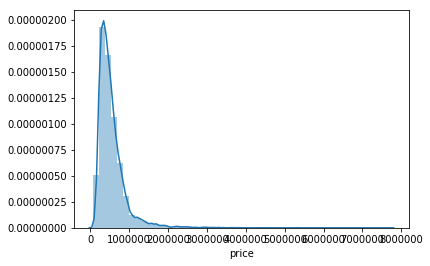

In [7]:
sns.distplot(df['price']);

In [8]:
np.log(df.price.mean())

13.199873477975252

Price is a bit skewed, so a log transformation may be used to normalize.

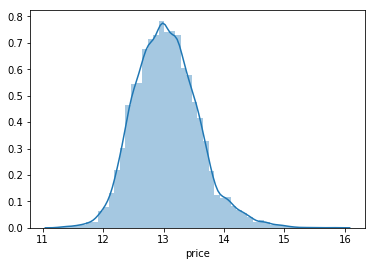

In [9]:
df.price = np.log(df.price)
sns.distplot(df.price)

13.048210941923964


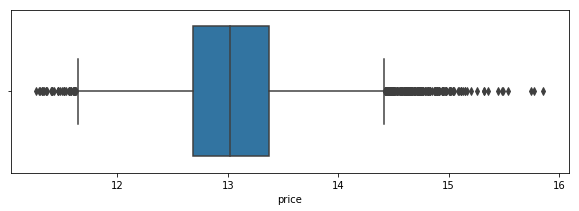

In [10]:
print(df.price.mean())
plt.figure(figsize=(10,3))
sns.boxplot(df.price);

### Remove Outliers

### Dealing with NaNs

In [11]:
df.sqft_basement = df.sqft_basement.replace('?', '0.0') #Replacing ? with the most common value

In [12]:
df.waterfront.fillna(0.0, inplace=True) #Less than 1% of the properties were on the water, so I replaced the NaNs with 0.0.

In [13]:
df.yr_renovated.value_counts(dropna=False) #It looks as if 0 indicates that it's never been renovated.

0.0       17011
NaN        3842
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2005.0       29
2000.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2001.0       15
2008.0       15
2010.0       15
1983.0       15
2015.0       14
1986.0       14
1987.0       14
1994.0       14
1985.0       14
1992.0       13
1995.0       12
1997.0       12
          ...  
1964.0        5
1975.0        5
1973.0        4
1981.0        4
1963.0        4
1969.0        4
1965.0        4
1972.0        3
1956.0        3
1945.0        3
1960.0        3
1978.0        3
1958.0        3
1955.0        3
1974.0        2
1962.0        2
1967.0        2
1940.0        2
1957.0        2
1946.0        1
1959.0        1
1951.0        1
1954.0        1
1950.0        1
1971.0        1
1944.0        1
1948.0        1
1976.0        1
1934.0        1
1953.0        1
Name: yr_renovated, Leng

In [14]:
yes_ren = df.loc[df.yr_renovated > 0.0] #Assuming year "0" indicates home has never been renovated

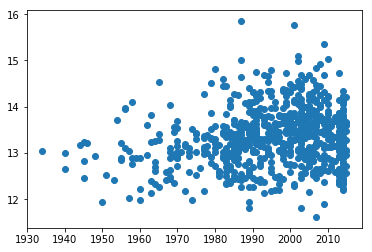

In [15]:
plt.scatter(yes_ren.yr_renovated, yes_ren.price) 

In [16]:
df = df.drop("yr_renovated", axis=1)

It looks like there is a general trend towards higher priced homes having been more recently renovated. Because the stakeholders are renovators who flip houses, I can discard this column because the homes will be put back on the market as recently renovated homes, hopefully selling for more than purchase price plus the cost of renovations!

In [17]:
df.view.value_counts(dropna=False) 

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
NaN       63
Name: view, dtype: int64

In [18]:
df.view.fillna(0.0, inplace=True) #replacing NaNs with mode

In [19]:
df.bedrooms = df.bedrooms.replace(33, 3) #removing the outlier

### Multicollinearity Check

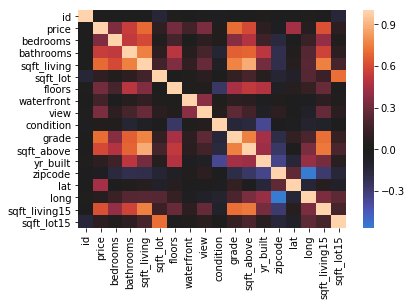

In [20]:
sns.heatmap(df.corr(), center=0,);

In [21]:
df = df.drop(['id'], axis=1) #Dropping target variable and unusable ID column

In [22]:
abs(df.corr()) > 0.8 #Finding correlations higher than 80%

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [23]:
df = df.drop(['sqft_above','sqft_living15'], axis=1) #Too highly correlated with sqft_living

In [24]:
df = df.drop('date', axis=1)

Dropping date sold because it may give us information about market fluctuations but can't predict future market fluctuations (should be a study on it's own).

### Normalize Continuous Features


In [25]:
df.sqft_basement = df.sqft_basement.astype('float')

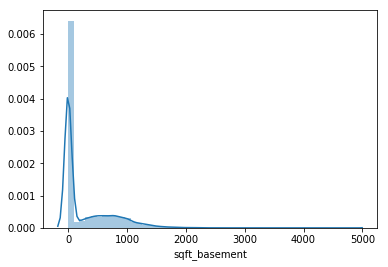

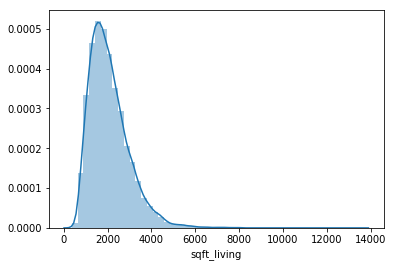

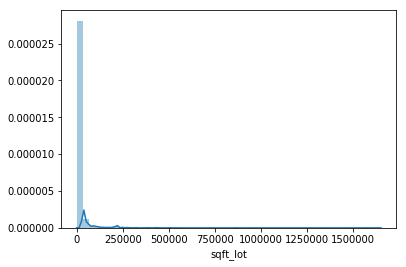

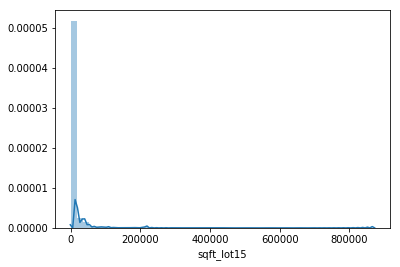

In [26]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    sns.distplot(df[column])
    plt.show()

In [27]:
df.sqft_basement.replace("nan", 0.0)
df.sqft_basement += .01
df.sqft_basement.head() #adding .01 to each value in order to log transform 

0      0.01
1    400.01
2      0.01
3    910.01
4      0.01
Name: sqft_basement, dtype: float64

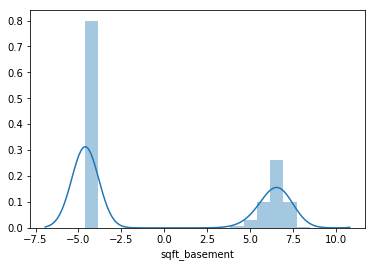

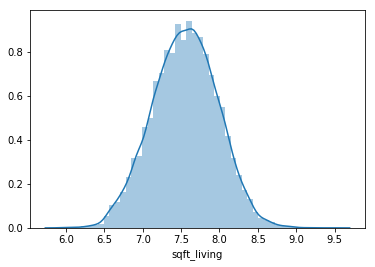

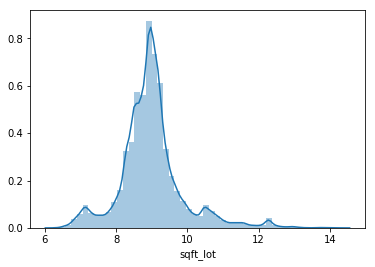

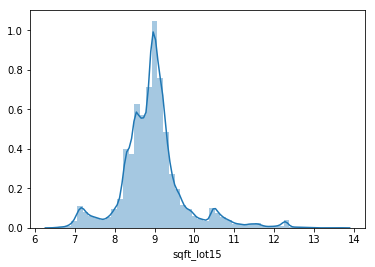

In [28]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    df[column] = np.log(df[column]) #log transform each continuous variable to deal with skewness
    
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    sns.distplot(df[column])
    plt.show()

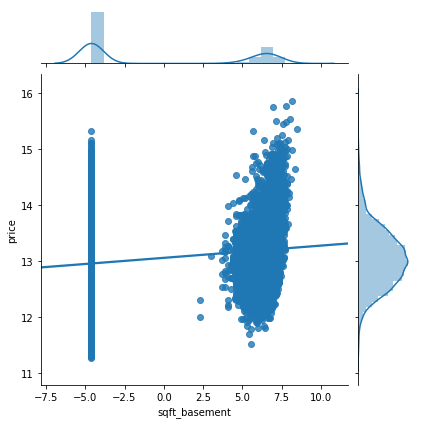

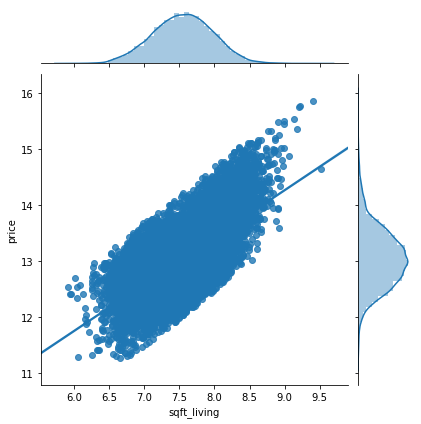

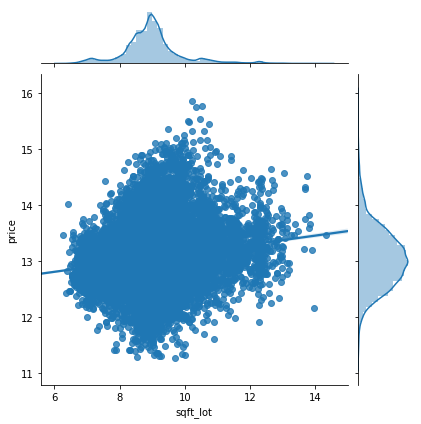

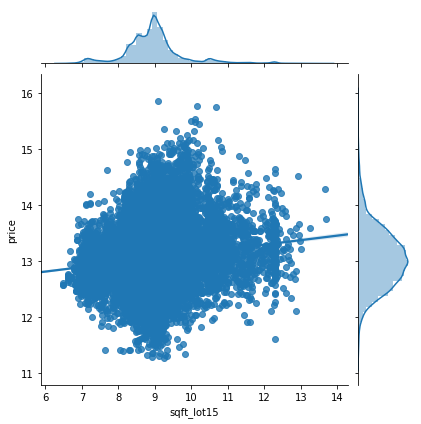

In [29]:
for column in ['sqft_basement', 'sqft_living', 'sqft_lot', 'sqft_lot15']:
    sns.jointplot(df[column], "price", data=df, kind='reg')
    plt.show()

In [30]:
df = df.drop(['sqft_lot', 'sqft_lot15'], axis=1)

Both lot variables do not show a robust linearity with our target variables and will need to be dropped. The basement variable seems to have a strangely accurate line of best fit. 

### One-Hot Encode Categorical Features

In [31]:
df = df.drop(['lat', 'long', 'view'], axis=1)  


Dropping view because it indicated whether the house has been viewed by prospective buyers. It may be interesting to know how many times it's been viewed before it's been sold, but that's not the purpose of this study. 

Dropping lat and long because zip code as an indicator of area has more to do with housing prices because of school districts, etc, than it's precise location on a map. Possibility to redo this study in the future to add lat and long back in and see what happens.

In [32]:
cat_bedrooms = df.bedrooms.astype('category') #changing each categorical variable from numerical to categorical
cat_bathrooms = df.bathrooms.astype('category')
cat_floors = df.floors.astype('category')
cat_waterfront = df.waterfront.astype('category')
cat_condition = df.condition.astype('category')
cat_grade = df.grade.astype('category')

In [33]:
bath_dum = pd.get_dummies(cat_bathrooms, prefix="bath_") #Getting dummy variables
bed_dum = pd.get_dummies(cat_bedrooms, prefix="bed_") 
floors_dum = pd.get_dummies(cat_floors, prefix="flrs_")
waterfront_dum = pd.get_dummies(cat_waterfront, prefix="wf_")
condition_dum = pd.get_dummies(cat_condition, prefix="con_")
grade_dum = pd.get_dummies(cat_grade, prefix="grade_")

In [34]:
df = df.drop(['bathrooms', 'bedrooms', 'floors', 'waterfront', 'condition', 'grade'], axis=1) #dropping to replace with dummy variables

In [35]:
df = pd.concat([df, bath_dum, bed_dum, floors_dum, waterfront_dum, condition_dum, grade_dum], axis=1)

In [36]:
df.columns

Index(['price', 'sqft_living', 'sqft_basement', 'yr_built', 'zipcode',
       'bath__0.5', 'bath__0.75', 'bath__1.0', 'bath__1.25', 'bath__1.5',
       'bath__1.75', 'bath__2.0', 'bath__2.25', 'bath__2.5', 'bath__2.75',
       'bath__3.0', 'bath__3.25', 'bath__3.5', 'bath__3.75', 'bath__4.0',
       'bath__4.25', 'bath__4.5', 'bath__4.75', 'bath__5.0', 'bath__5.25',
       'bath__5.5', 'bath__5.75', 'bath__6.0', 'bath__6.25', 'bath__6.5',
       'bath__6.75', 'bath__7.5', 'bath__7.75', 'bath__8.0', 'bed__1',
       'bed__2', 'bed__3', 'bed__4', 'bed__5', 'bed__6', 'bed__7', 'bed__8',
       'bed__9', 'bed__10', 'bed__11', 'flrs__1.0', 'flrs__1.5', 'flrs__2.0',
       'flrs__2.5', 'flrs__3.0', 'flrs__3.5', 'wf__0.0', 'wf__1.0', 'con__1',
       'con__2', 'con__3', 'con__4', 'con__5', 'grade__3', 'grade__4',
       'grade__5', 'grade__6', 'grade__7', 'grade__8', 'grade__9', 'grade__10',
       'grade__11', 'grade__12', 'grade__13'],
      dtype='object')

### Binning Categories

In [37]:
bins = [1900, 1951, 1975, 1997, 2015] #Four equal bins of years

yr_built_bins = pd.cut(df.yr_built, bins)#Segmenting and sorting into bins

In [38]:
yr_built_bins = yr_built_bins.cat.as_unordered() 

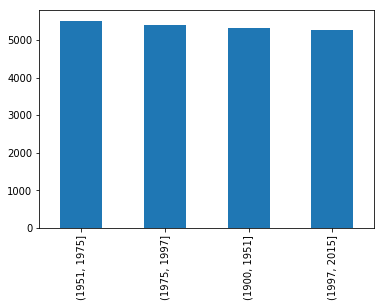

In [39]:
yr_built_bins.value_counts().plot(kind='bar'); #seeing how they're spaced

In [40]:
df.yr_built = yr_built_bins
df.yr_built = df.yr_built.cat.codes
yr_built_dum = pd.get_dummies(yr_built_bins, prefix='yr_built_') #Binning, getting category codes, and dummy variables

In [41]:
df = pd.concat([df, yr_built_dum], axis=1)
df = df.drop('yr_built', axis=1)

In [42]:
df.zipcode.describe() #Making a decision on what the bins should be

count    21597.000000
mean     98077.951845
std         53.513072
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64

In [43]:
bins = [98001, 98033, 98065, 98118, 98199]

zip_bins = pd.cut(df.zipcode, bins)


In [44]:
df.zipcode = zip_bins
df.zipcode = df.zipcode.cat.codes
zip_dum = pd.get_dummies(zip_bins, prefix='zip')

df = df.drop('zipcode', axis=1)
df = pd.concat([df, zip_dum], axis=1)

## Train-Test-Split

In [45]:
y = df.price
X = df.drop(["price"], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3) #80/20 Train v. Test split

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.09022814967217259
Test Mean Squared Error: 0.09403098334645003


In [46]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: 0.09022814967217259
Test Mean Squared Error: 0.09403098334645003


## Modeling

### OLS Regression with Statsmodels

In [47]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols 

In [48]:
#editing column names in order for modeling to work
df_ols = pd.concat([y_train, X_train], axis=1)
df_ols.columns = [x.strip().replace('.', '_') for x in df_ols.columns]
df_ols.columns = [x.strip().replace(']', ')') for x in df_ols.columns]
df_ols.rename({"zip_(98001, 98033)":"zip_98001_98033", 'zip_(98033, 98065)':'zip_98033_98065', 'zip_(98065, 98118)':'zip_98065_98118','zip_(98118, 98199)':'zip_98118_98199','yr_built__(1900, 1951)':'yr_built_1900_1951', 'yr_built__(1951, 1975)':'yr_built_1951_1975','yr_built__(1975, 1997)':'yr_built_1975_1997', 'yr_built__(1997, 2015)':'yr_built_1997_2015'}, axis=1, inplace=True)

In [49]:
df_ols = df_ols.drop(['bath__8_0','bed__11','flrs__3_5','wf__1_0', 'con__5', 'grade__13', 'yr_built_1997_2015','zip_98118_98199'], axis=1)
#dropping one categorical column apiece to account for multicollinearity

In [50]:
import statsmodels.api as sm
features = df_ols.drop('price', axis=1)
features_int = sm.add_constant(features)
model = sm.OLS(df_ols['price'],features_int).fit()
model.summary()

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     522.0
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:05:21   Log-Likelihood:                -3964.7
No. Observations:               17277   AIC:                             8063.
Df Residuals:                   17210   BIC:                             8583.
Df Model:                          66                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.2234      0.418     26.862      0.000      10.404      12.042
sqft_living            0.4410      0.012     36.272      0.000       0.417       0.465
sqft_basement          0.0050      0.001      9.195      0.000       0.004       0.006
bath__0_5             -0.5477      0.274     -1.996      0.046      -1.086      -0.010
bath__0_75            -0.2312      0.233     -0.994      0.320      -0.687       0.225
bath__1_0             -0.2162      0.228     -0.948      0.343      -0.663       0.231
bath__1_25            -0.0778      0.255     -0.305      0.761      -0.578       0.423
bath__1_5             -0.2156      0.228     -0.946      0.344      -0.663       0.231
bath__1_75            -0.1780      0.228     -0.781      0.435      -0.625       0.269
bath__2_0             -0.1791      0.228     -0.786      0.432      -0.626       0.268
bath__2_25            -0.1470      0.228     -0.645      0.519      -0.593       0.300
bath__2_5             -0.1733      0.228     -0.761      0.446      -0.620       0.273
bath__2_75            -0.1374      0.228     -0.603      0.546      -0.584       0.309
bath__3_0             -0.1239      0.228     -0.544      0.586      -0.570       0.323
bath__3_25            -0.0542      0.228     -0.238      0.812      -0.500       0.392
bath__3_5             -0.0850      0.228     -0.373      0.709      -0.531       0.361
bath__3_75             0.0332      0.229      0.145      0.885      -0.415       0.481
bath__4_0             -0.0302      0.228     -0.132      0.895      -0.477       0.417
bath__4_25             0.0233      0.230      0.101      0.919      -0.427       0.474
bath__4_5              0.0047      0.229      0.021      0.984      -0.445       0.454
bath__4_75             0.0399      0.235      0.169      0.865      -0.422       0.501
bath__5_0              0.0671      0.238      0.282      0.778      -0.399       0.533
bath__5_25             0.1401      0.247      0.567      0.571      -0.344       0.625
bath__5_5              0.1390      0.241      0.576      0.565      -0.334       0.612
bath__5_75            -0.0405      0.267     -0.152      0.879      -0.564       0.483
bath__6_0              0.4888      0.274      1.785      0.074      -0.048       1.026
bath__6_25             0.2983      0.308      0.969      0.332      -0.305       0.902
bath__6_5             -0.1795      0.312     -0.575      0.566      -0.792       0.433
bath__6_75             0.1571      0.381      0.412      0.680      -0.590       0.904
bath__7_5              0.0832      0.411      0.203      0.839      -0.722       0.888
bath__7_75             0.8314      0.379      2.191      0.028       0.088       1.575
bed__1                 0.4485      0.307      1.463      0.144      -0.152       1.050
bed__2                 0.3970      0.3

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


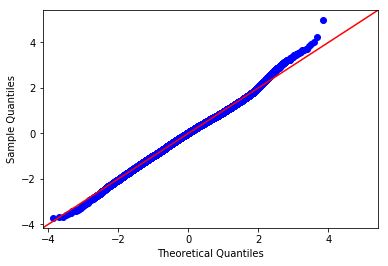

In [51]:
from scipy import stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show();

### Multiple Linear Regression with SKLearn

In [52]:
#editing column names in order for modeling to work

X_train.columns = [x.strip().replace('.', '_') for x in X_train.columns]
X_train.columns = [x.strip().replace(']', ')') for x in X_train.columns]
X_train.rename({"zip_(98001, 98033)":"zip_98001_98033", 'zip_(98033, 98065)':'zip_98033_98065', 'zip_(98065, 98118)':'zip_98065_98118','zip_(98118, 98199)':'zip_98118_98199','yr_built__(1900, 1951)':'yr_built_1900_1951', 'yr_built__(1951, 1975)':'yr_built_1951_1975','yr_built__(1975, 1997)':'yr_built_1975_1997', 'yr_built__(1997, 2015)':'yr_built_1997_2015'}, axis=1, inplace=True)
X_train_sk = X_train.drop(['bath__8_0','bed__11','flrs__3_5','wf__1_0', 'con__5', 'grade__13', 'yr_built_1997_2015','zip_98118_98199'], axis=1)


C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [53]:
linreg = LinearRegression()
linreg.fit(X_train_sk, y_train)
print(linreg.intercept_) #Modeling with sklearn
linreg.coef_#Modeling with sklearn

11.223420668774802


array([ 0.4409693 ,  0.0049623 , -0.54767023, -0.23115137, -0.21621989,
       -0.07778941, -0.21560865, -0.1779746 , -0.17905691, -0.14698464,
       -0.17334756, -0.13738449, -0.12394085, -0.05417854, -0.08499659,
        0.03315847, -0.03017652,  0.02328605,  0.0047397 ,  0.03990748,
        0.06708746,  0.14011526,  0.1389612 , -0.04046071,  0.48880469,
        0.29832593, -0.17948277,  0.15709376,  0.08322516,  0.83135332,
        0.44852698,  0.39704666,  0.31493919,  0.28420854,  0.27494464,
        0.25932354,  0.23231426,  0.33964569,  0.07212473,  0.25882508,
       -0.07499214, -0.03402272, -0.05409297,  0.01986695,  0.065848  ,
       -0.53402192, -0.22837799, -0.27894088, -0.11113464, -0.07076741,
       -1.46443881, -1.82069535, -1.68713949, -1.52675476, -1.27659967,
       -1.04975787, -0.79979371, -0.60821779, -0.44419719, -0.21379848,
        0.32872333,  0.11158101, -0.02596554,  0.04513871,  0.03970876,
        0.14692427])

### Multiple Linear Regression with Ridge

In [54]:
from sklearn.linear_model import Ridge #Ridge handles multicollinearity issues, so can be used without dropping categories
clf = Ridge(alpha=1.0)
ridge_model = clf.fit(X_train, y_train) 
print(f'Ridge R-Squared: {ridge_model.score(X_train, y_train)}')

Ridge R-Squared: 0.6754805575642927


Better than previous models!

### Feature Selection

#### RFE

We most likely can cut out 2/3 of the variables based on the p-values from the statsmodels model

In [55]:
#from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 30)
selector = selector.fit(X_train_sk, y_train)

print(selector.support_ )
selector.ranking_


[ True False  True False False False False False False False False False
 False False False False False False False False False  True  True False
  True  True  True False False  True  True  True  True False False  True
 False  True False  True False False False False  True  True  True  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True False False False False]


array([ 1, 36,  1,  7,  8, 20,  9, 12, 11, 13, 10, 14, 15, 21, 19, 30, 23,
       31, 37, 29, 25,  1,  1, 22,  1,  1,  1,  6, 34,  1,  1,  1,  1,  4,
        2,  1,  3,  1, 24,  1, 33, 35, 32, 16,  1,  1,  1,  1, 17, 18,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 28, 26, 27,  5])

In [56]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 0.53160699 -0.33876144  0.20194723  0.14366247  0.50401903  0.24897727
 -0.10154903  0.76877087  0.17524951  0.10898464  0.02680535  0.019391
  0.14926123  0.05535109  0.18995555 -0.53618341 -0.15223756 -0.19657596
 -1.48973582 -1.92180392 -1.79081279 -1.62210388 -1.34864371 -1.1125582
 -0.86595221 -0.65224377 -0.46940385 -0.25197841  0.39898846  0.12421599]
10.603201923848353


In [57]:
selected_columns = X_train_sk.columns[selector.support_ ]
linreg.fit(X_train_sk[selected_columns],y_train)
print(linreg.intercept_) #Modeling with sklearn
linreg.coef_

10.603201923848353


array([ 0.53160699, -0.33876144,  0.20194723,  0.14366247,  0.50401903,
        0.24897727, -0.10154903,  0.76877087,  0.17524951,  0.10898464,
        0.02680535,  0.019391  ,  0.14926123,  0.05535109,  0.18995555,
       -0.53618341, -0.15223756, -0.19657596, -1.48973582, -1.92180392,
       -1.79081279, -1.62210388, -1.34864371, -1.1125582 , -0.86595221,
       -0.65224377, -0.46940385, -0.25197841,  0.39898846,  0.12421599])

In [58]:
X_train_RFE = X_train[selected_columns]

In [59]:
features_int = sm.add_constant(X_train_RFE)
model = sm.OLS(y_train,features_int).fit()
model.summary()

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1044.
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:05:23   Log-Likelihood:                -4517.1
No. Observations:               17277   AIC:                             9096.
Df Residuals:                   17246   BIC:                             9337.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 10.6032      0.149     71.187      0.000      10.311      10.895
sqft_living            0.5316      0.011     50.312      0.000       0.511       0.552
bath__0_5             -0.3388      0.158     -2.150      0.032      -0.648      -0.030
bath__5_25             0.2019      0.103      1.965      0.049       0.001       0.403
bath__5_5              0.1437      0.103      1.399      0.162      -0.058       0.345
bath__6_0              0.5040      0.162      3.117      0.002       0.187       0.821
bath__6_25             0.2490      0.230      1.085      0.278      -0.201       0.699
bath__6_5             -0.1015      0.224     -0.454      0.650      -0.540       0.337
bath__7_75             0.7688      0.334      2.302      0.021       0.114       1.423
bed__1                 0.1752      0.028      6.353      0.000       0.121       0.229
bed__2                 0.1090      0.010     10.910      0.000       0.089       0.129
bed__3                 0.0268      0.006      4.431      0.000       0.015       0.039
bed__6                 0.0194      0.022      0.869      0.385      -0.024       0.063
bed__8                 0.1493      0.101      1.479      0.139      -0.049       0.347
bed__10                0.0554      0.228      0.242      0.808      -0.392       0.503
flrs__3_0              0.1900      0.015     12.791      0.000       0.161       0.219
wf__0_0               -0.5362      0.029    -18.203      0.000      -0.594      -0.478
con__1                -0.1522      0.065     -2.351      0.019      -0.279      -0.025
con__2                -0.1966      0.027     -7.252      0.000      -0.250      -0.143
grade__3              -1.4897      0.335     -4.446      0.000      -2.147      -0.833
grade__4              -1.9218      0.133    -14.446      0.000      -2.183      -1.661
grade__5              -1.7908      0.114    -15.656      0.000      -2.015      -1.567
grade__6              -1.6221      0.112    -14.473      0.000      -1.842      -1.402
grade__7              -1.3486      0.111    -12.099      0.000      -1.567      -1.130
grade__8              -1.1126      0.111    -10.003      0.000      -1.331      -0.895
grade__9              -0.8660      0.111     -7.791      0.000      -1.084      -0.648
grade__10             -0.6522      0.111     -5.862      0.000      -0.870      -0.434
grade__11             -0.4694      0.112     -4.206      0.000      -0.688      -0.251
grade__12             -0.2520      0.116     -2.168      0.030      -0.480      -0.024
yr_built_1900_1951     0.3990      0.007     58.032      0.000       0.386       0.412
yr_built_1951_1975     0.1242      0.006     19.643      0.000       0.112       0.137
==============================================================================
Omnibus:                       56.161   Durbin

In [60]:
ridge_model = clf.fit(X_train_RFE, y_train) 
print(f'Ridge R-Squared: {ridge_model.score(X_train_RFE, y_train)}')

Ridge R-Squared: 0.6441711686815512


The Recurive Feature Selection method dropped the r2 value. Let's try stepwise selection.

#### Stepwise Selection

In [61]:
import statsmodels.api as sm

def stepwise_selection(X_train, y_train, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X_train.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y_train, sm.add_constant(pd.DataFrame(X_train[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [62]:
select_features = stepwise_selection(X_train_sk, y_train)

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  grade__6                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built_1900_1951             with p-value 0.0
Add  grade__7                       with p-value 1.07978e-292
Add  grade__8                       with p-value 1.57672e-179
Add  grade__5                       with p-value 6.85447e-244
Add  grade__9                       with p-value 2.23121e-123
Add  zip_98065_98118                with p-value 3.08001e-116
Add  wf__0_0                        with p-value 1.57756e-93
Add  yr_built_1951_1975             with p-value 1.2112e-71
Add  grade__4                       with p-value 1.32882e-66
Add  grade__10                      with p-value 4.54748e-46
Add  sqft_basement                  with p-value 1.7809e-27
Add  flrs__3_0                      with p-value 6.21303e-23
Add  bed__2                         with p-value 8.44133e-18
Add  con__3                         with p-value 1.44006e-18
Add  con__2                         with p-va

In [63]:
features_int = sm.add_constant(X_train[select_features])
model = sm.OLS(y_train,features_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     857.7
Date:                Tue, 18 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:07:19   Log-Likelihood:                -3997.8
No. Observations:               17277   AIC:                             8078.
Df Residuals:                   17236   BIC:                             8396.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.4473      0.146     78.409      0.000      11.161      11.733
grade__6              -1.7638      0.099    -17.892      0.000      -1.957      -1.571
sqft_living            0.4543      0.012     38.663      0.000       0.431       0.477
yr_built_1900_1951     0.3243      0.009     34.441      0.000       0.306       0.343
grade__7              -1.5136      0.098    -15.456      0.000      -1.706      -1.322
grade__8              -1.2835      0.098    -13.143      0.000      -1.475      -1.092
grade__5              -1.9255      0.101    -19.040      0.000      -2.124      -1.727
grade__9              -1.0332      0.097    -10.598      0.000      -1.224      -0.842
zip_98065_98118        0.1468      0.007     22.112      0.000       0.134       0.160
wf__0_0               -0.5391      0.029    -18.817      0.000      -0.595      -0.483
yr_built_1951_1975     0.1073      0.009     11.597      0.000       0.089       0.125
grade__4              -2.0694      0.121    -17.111      0.000      -2.306      -1.832
grade__10             -0.8398      0.098     -8.603      0.000      -1.031      -0.648
sqft_basement          0.0054      0.001     10.072      0.000       0.004       0.006
flrs__3_0              0.1213      0.015      8.025      0.000       0.092       0.151
bed__2                 0.1099      0.010     11.130      0.000       0.091       0.129
con__3                -0.1137      0.009    -12.206      0.000      -0.132      -0.095
con__2                -0.2829      0.027    -10.286      0.000      -0.337      -0.229
grade__11             -0.6673      0.099     -6.773      0.000      -0.860      -0.474
con__4                -0.0725      0.010     -7.601      0.000      -0.091      -0.054
flrs__1_0             -0.0349      0.007     -5.175      0.000      -0.048      -0.022
bath__2_5             -0.0230      0.007     -3.432      0.001      -0.036      -0.010
bed__1                 0.1599      0.027      5.958      0.000       0.107       0.212
bath__3_75             0.1682      0.029      5.820      0.000       0.112       0.225
bed__3                 0.0296      0.006      5.013      0.000       0.018       0.041
yr_built_1975_1997    -0.0277      0.007     -3.725      0.000      -0.042      -0.013
grade__3              -1.7430      0.322     -5.406      0.000      -2.375      -1.111
bath__3_25             0.0859      0.015      5.627      0.000       0.056       0.116
zip_98001_98033        0.0453      0.007      6.280      0.000       0.031       0.059
zip_98033_98065        0.0401      0.007      5.420      0.000       0.026       0.055
bath__1_5             -0.0468      0.010     -4.666      0.000      -0.066      -0.027
bath__1_0             -0.0379      0.009     -4.293      0.000      -0.055      -0.021
con__1                -0.2306      0.0

In [64]:
ridge_model = clf.fit(X_train[select_features], y_train) 
print(f'Ridge R-Squared: {ridge_model.score(X_train[select_features], y_train)}')

Ridge R-Squared: 0.6646690001876959


Not quite as great as the previous Ridge model, unfortunately but better than the one made with RFE.

### K Fold Cross Validation

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_10_results = cross_val_score(linreg, X_train[select_features], y_train, cv=10, scoring="neg_mean_squared_error")

cv_10_results

array([-0.08849521, -0.09291182, -0.09063156, -0.10113733, -0.09277806,
       -0.09611876, -0.0955642 , -0.08952932, -0.099698  , -0.09071714])

Our negative mean squared errors are pretty consistent across the board and very low, which is a good sign.

## Model Validation

### Checking for linearity

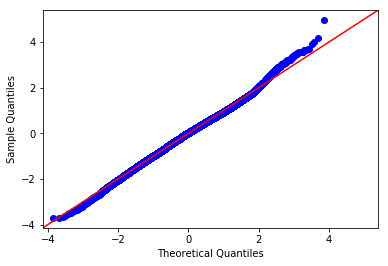

In [66]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

### Checking for homoscedasticity

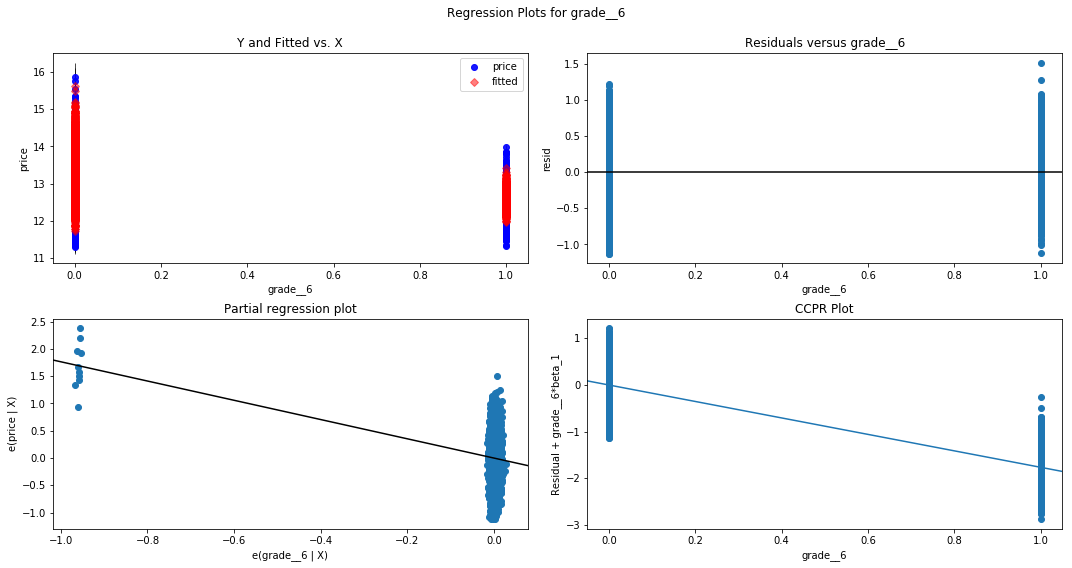

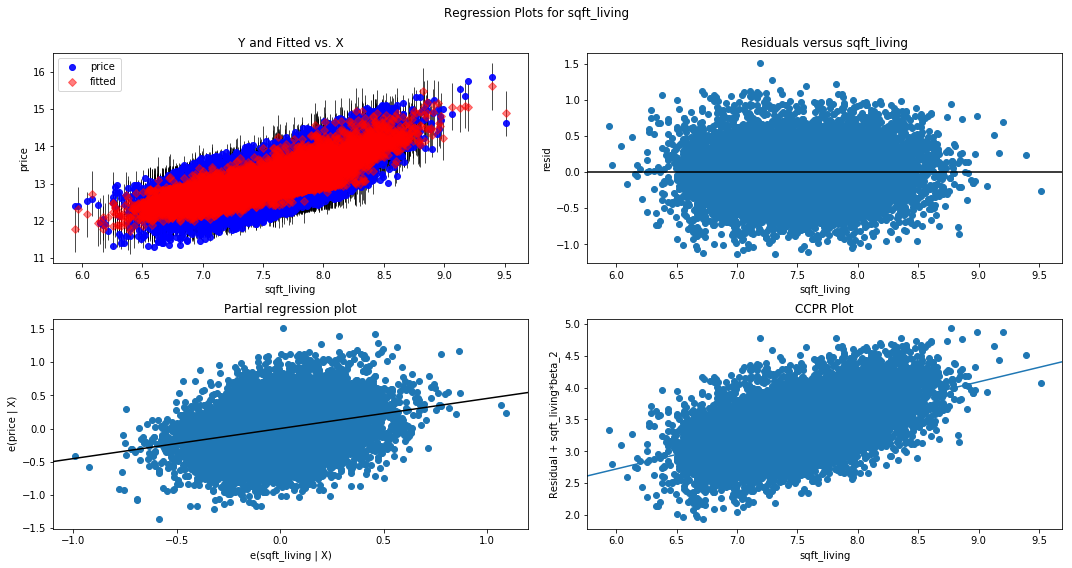

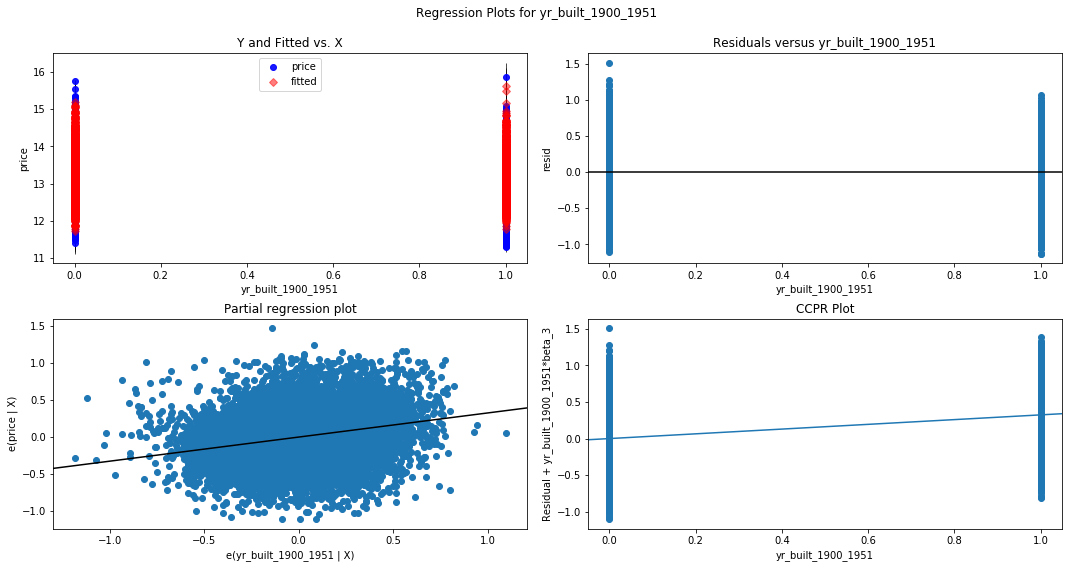

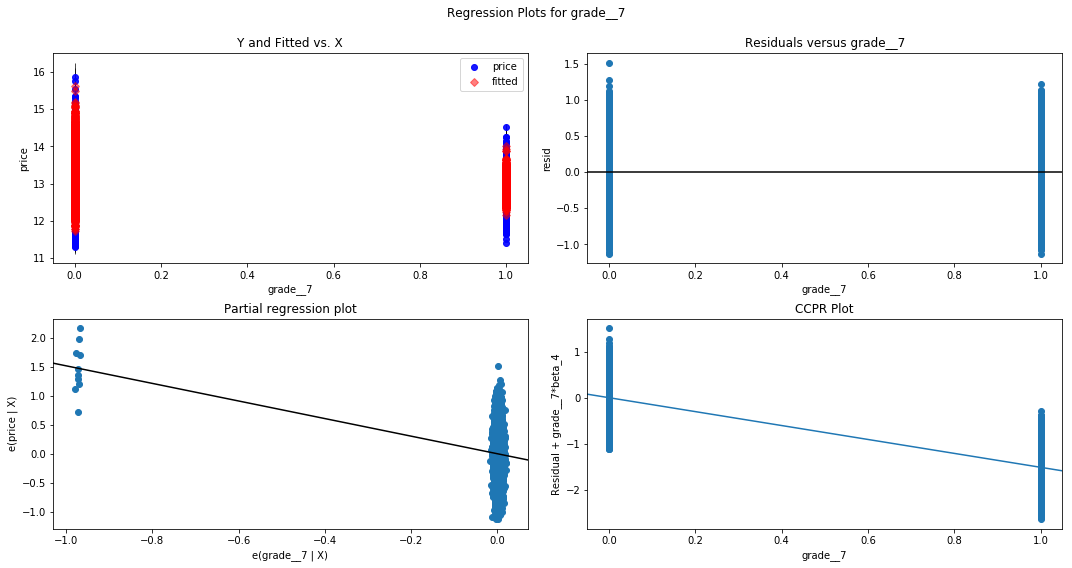

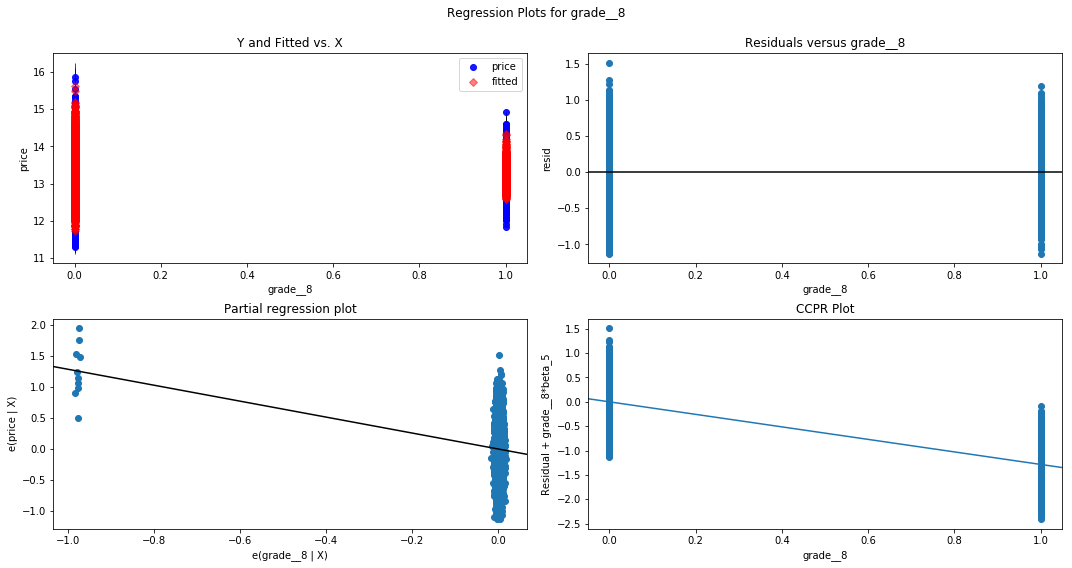

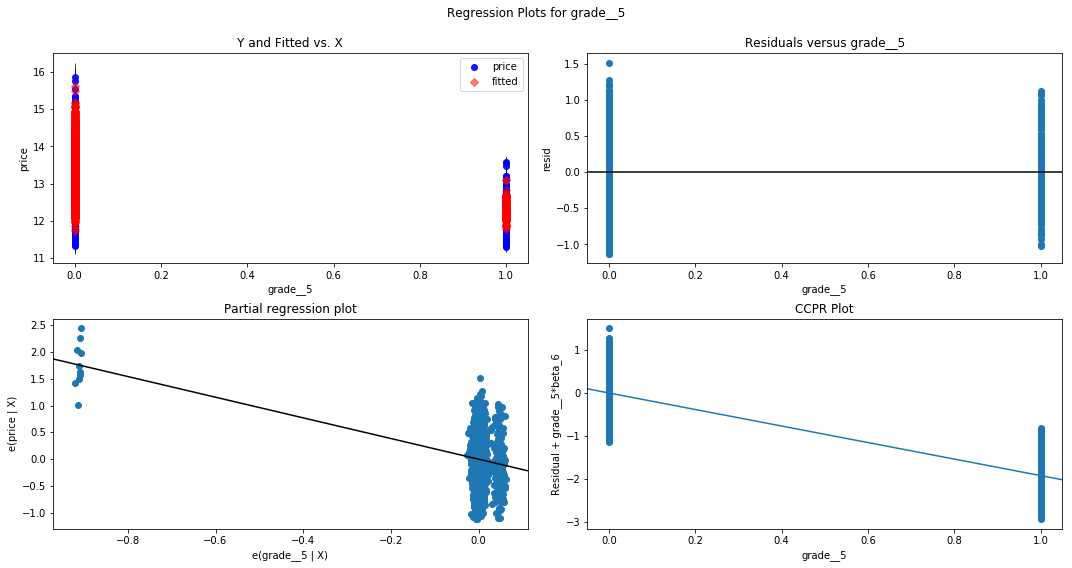

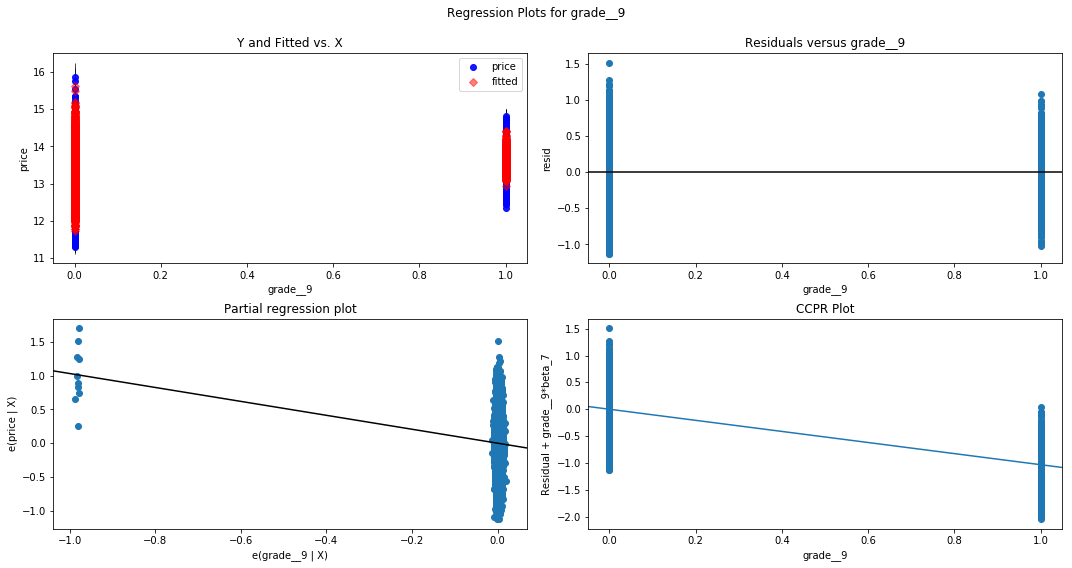

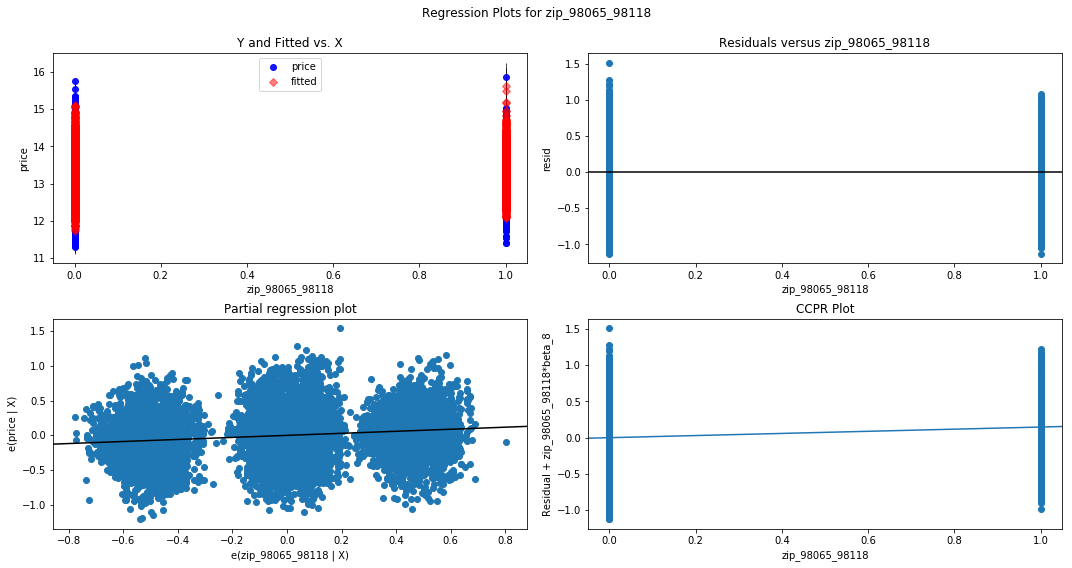

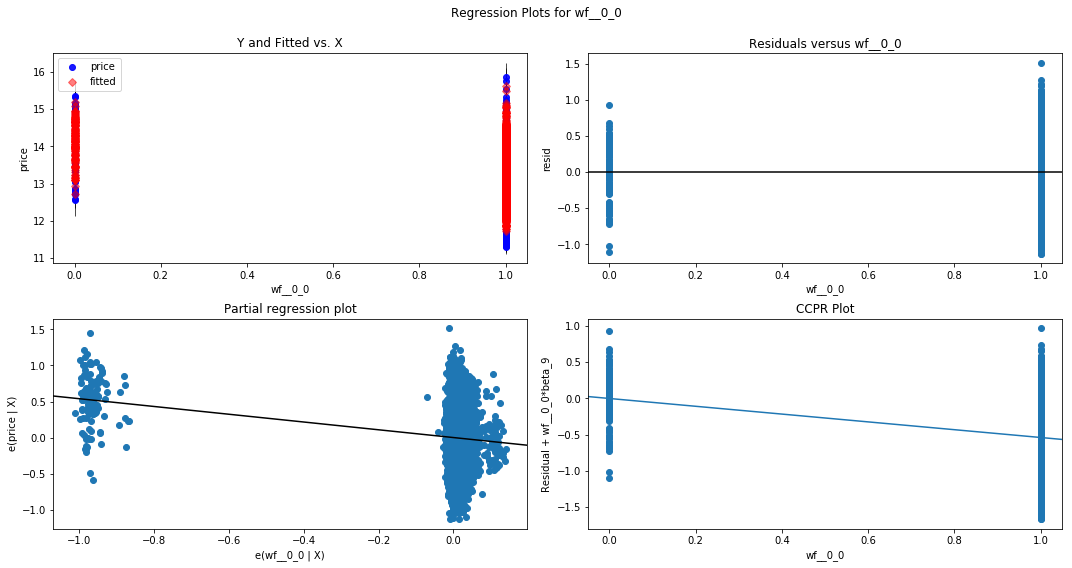

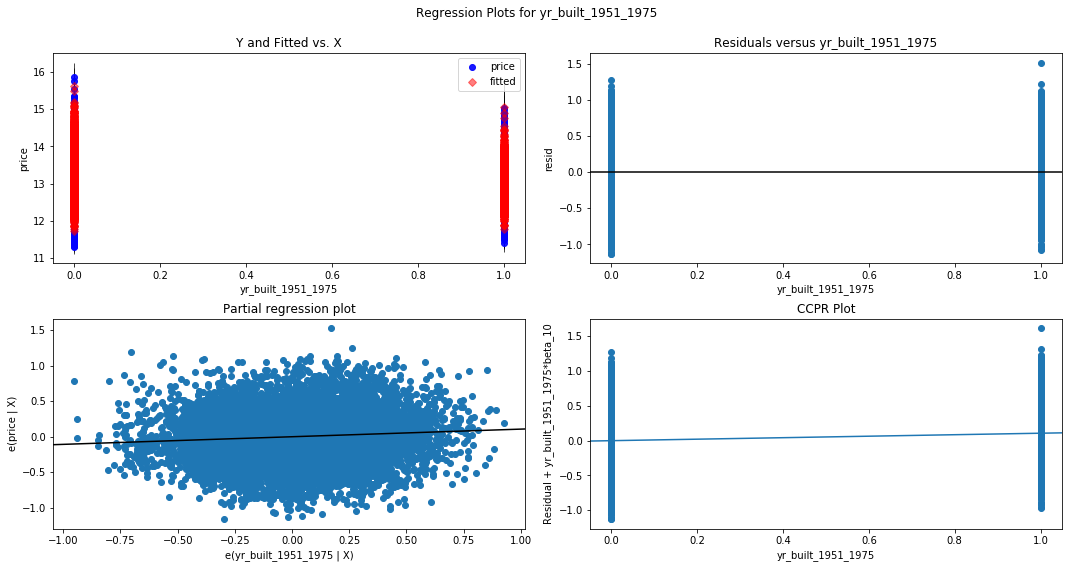

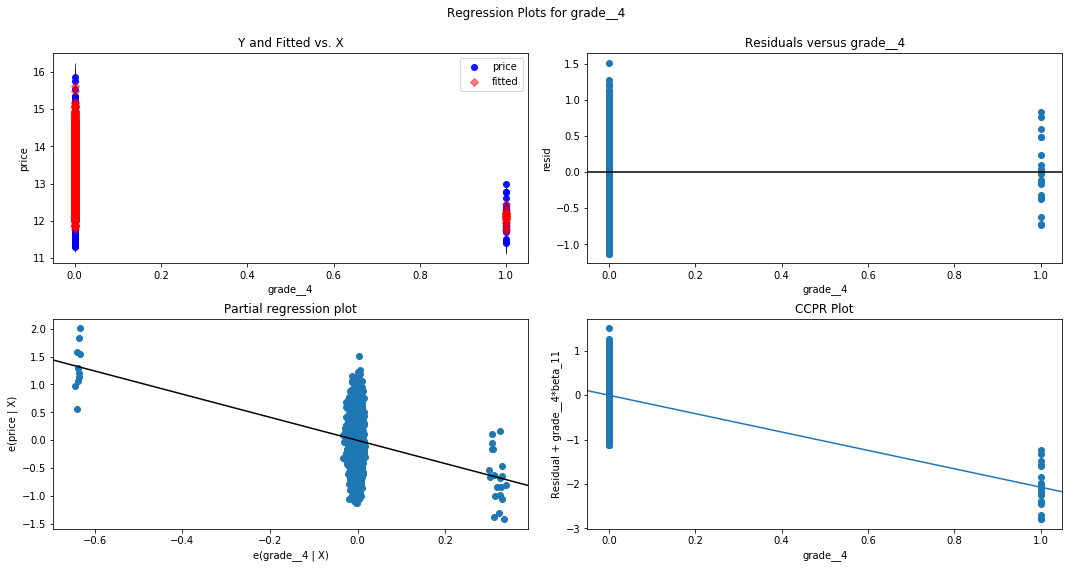

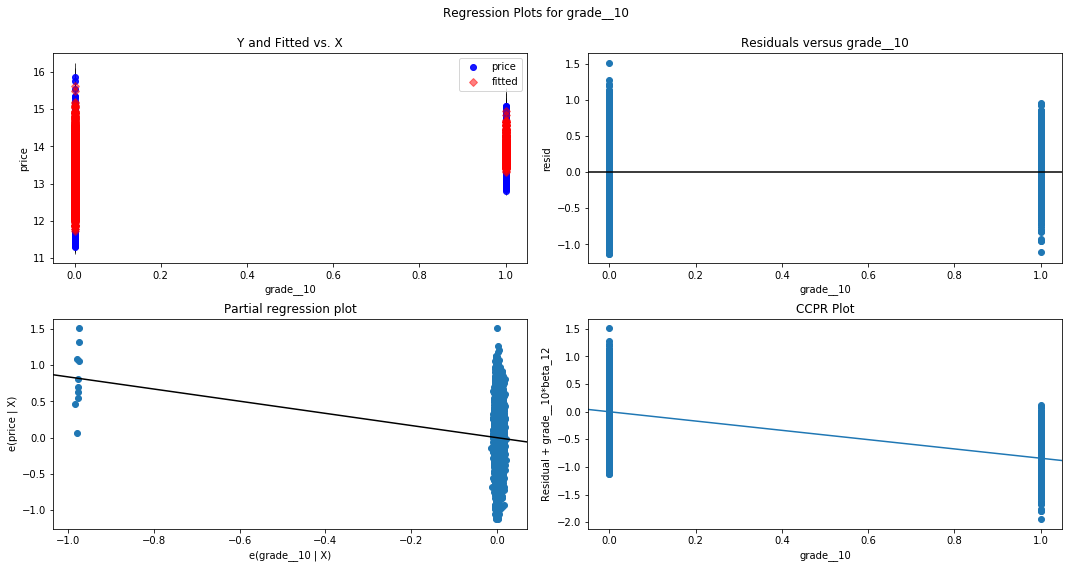

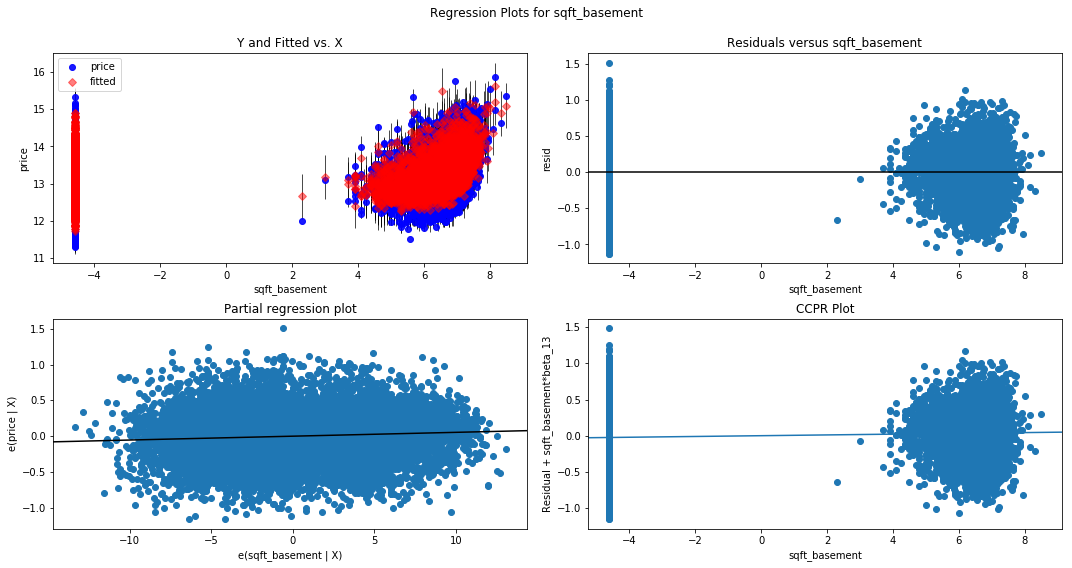

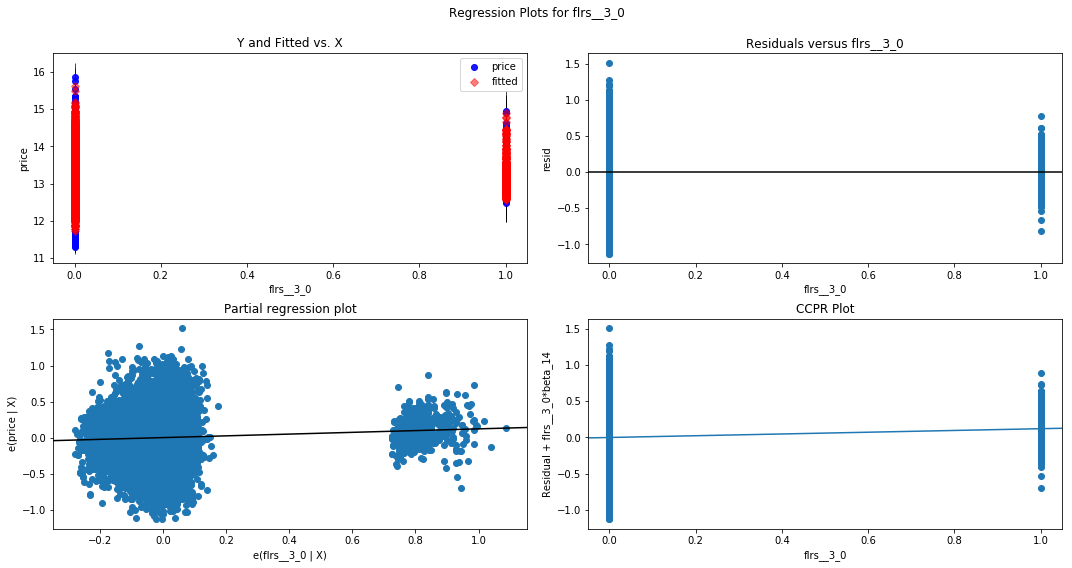

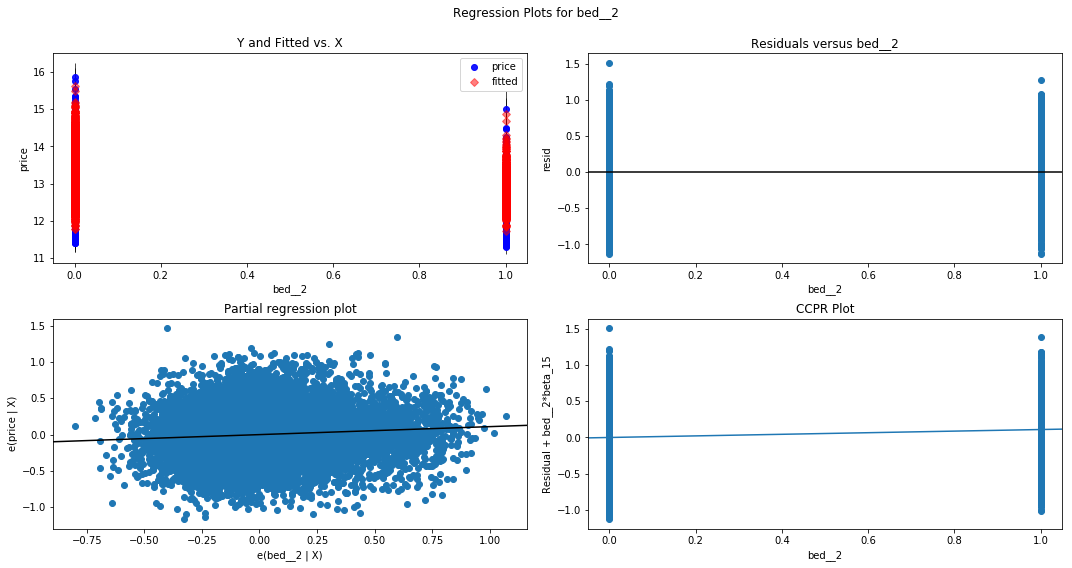

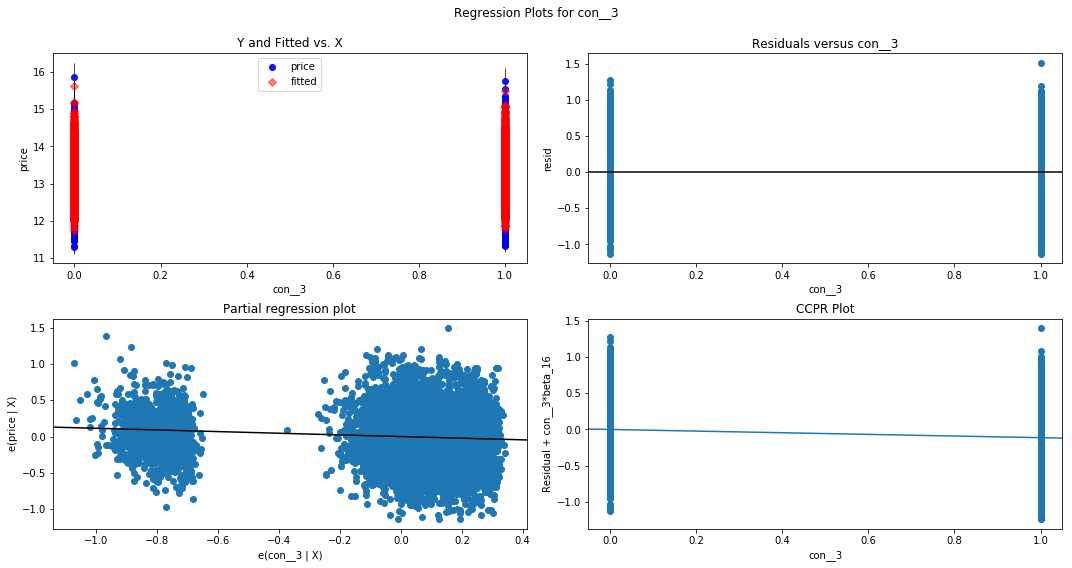

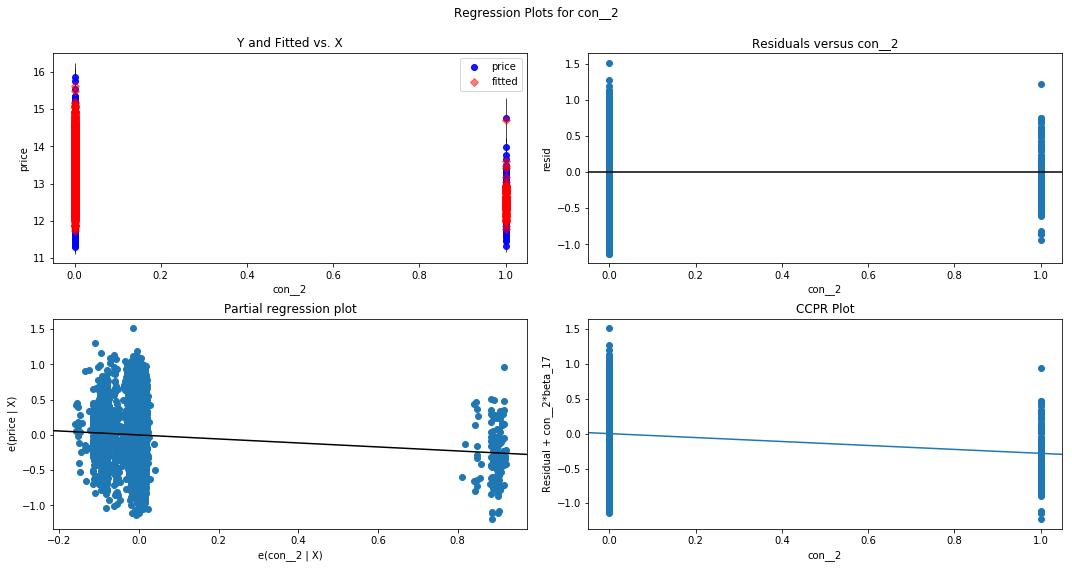

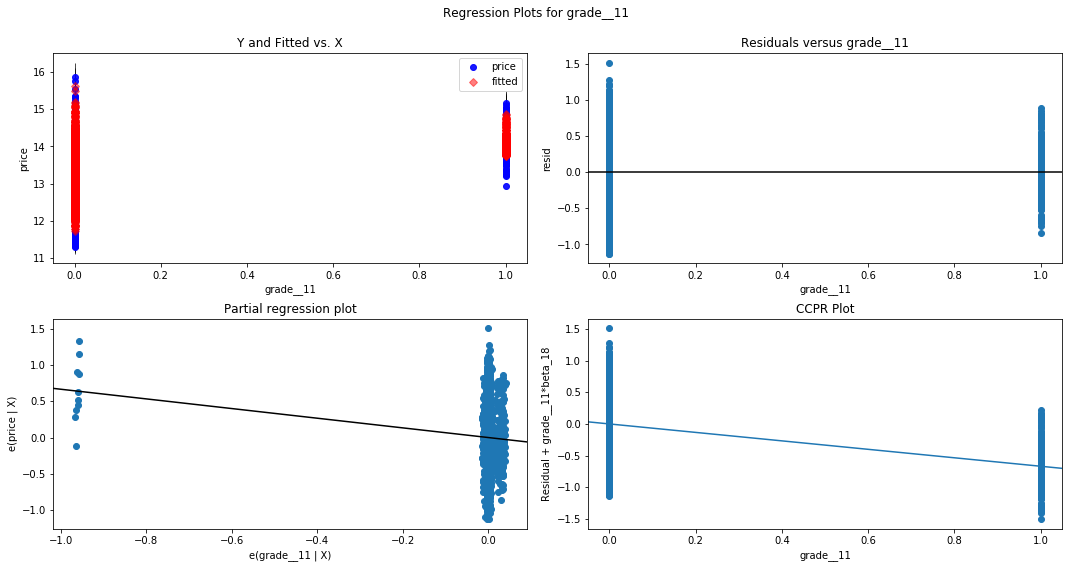

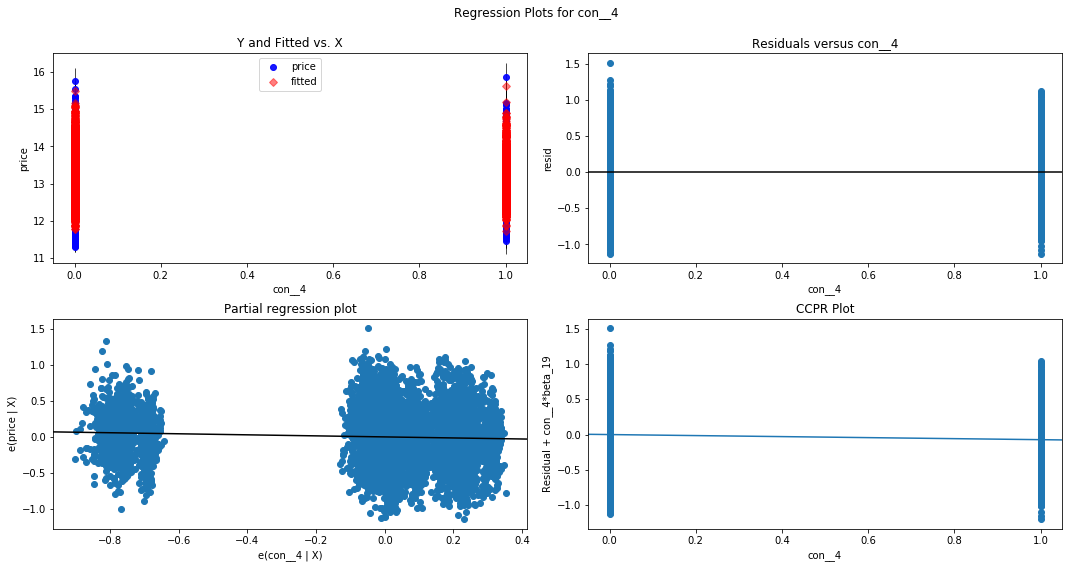

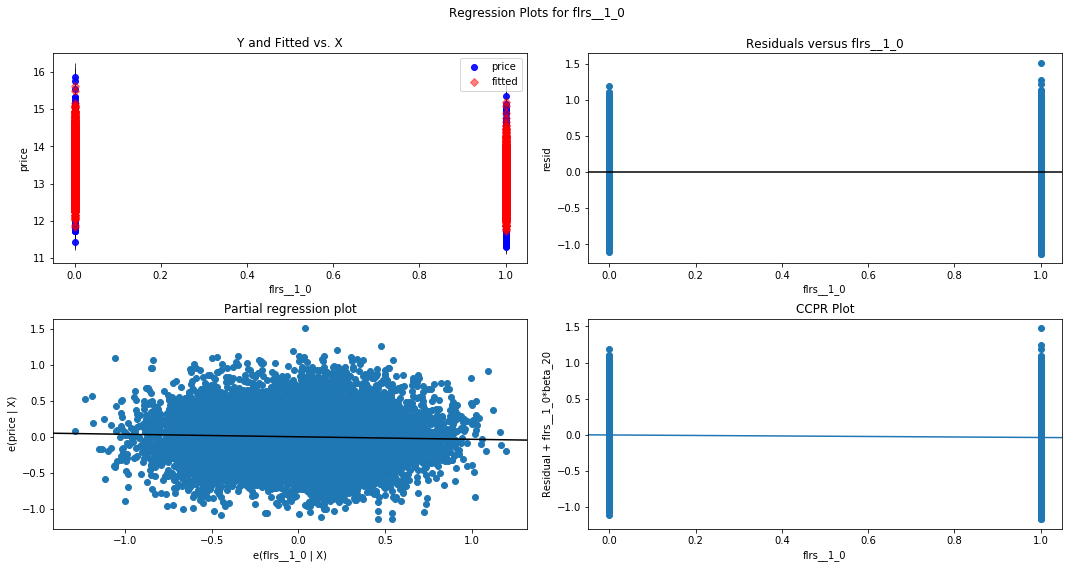

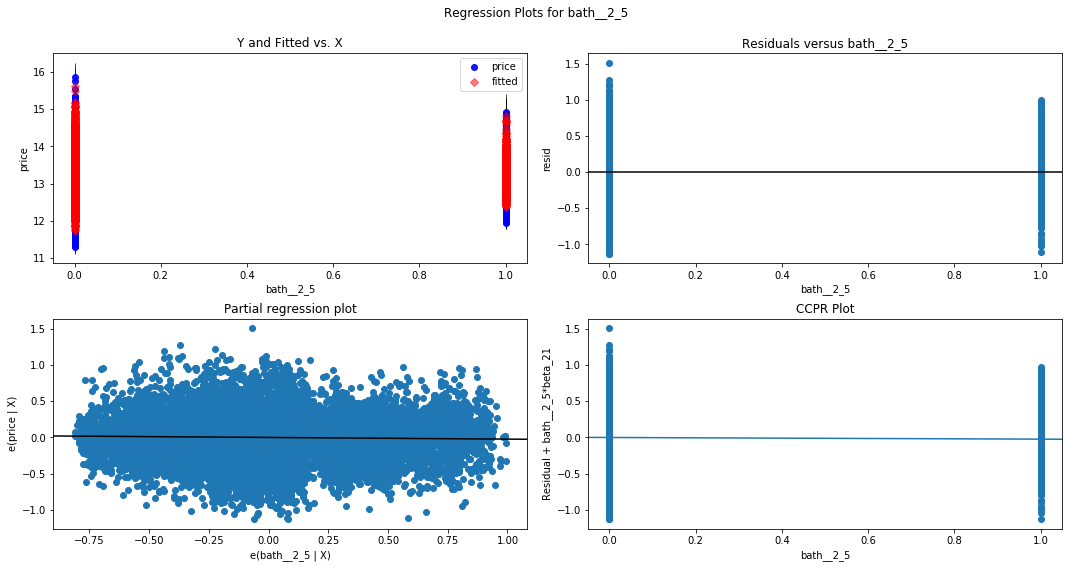

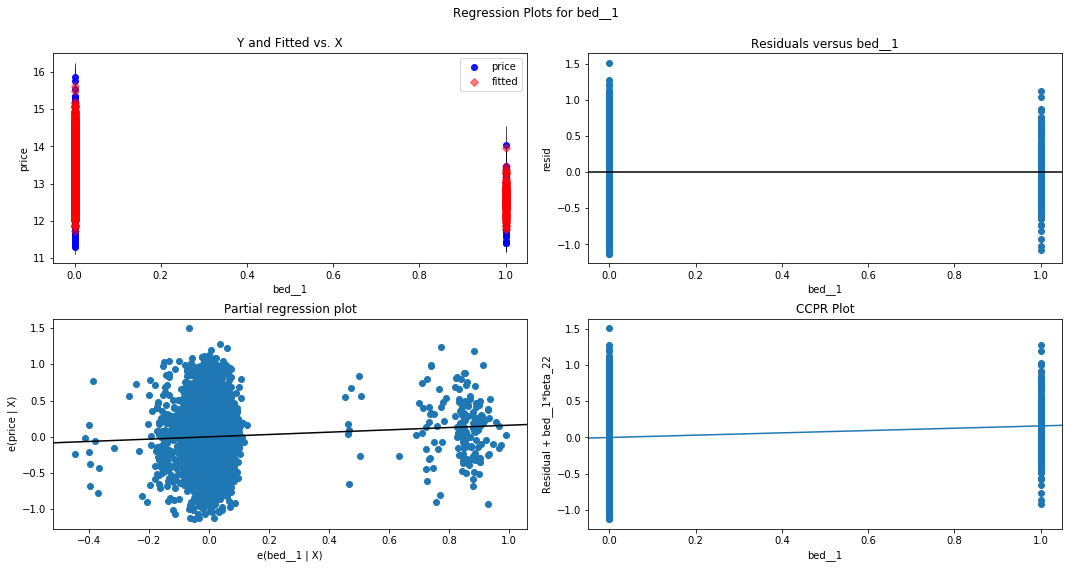

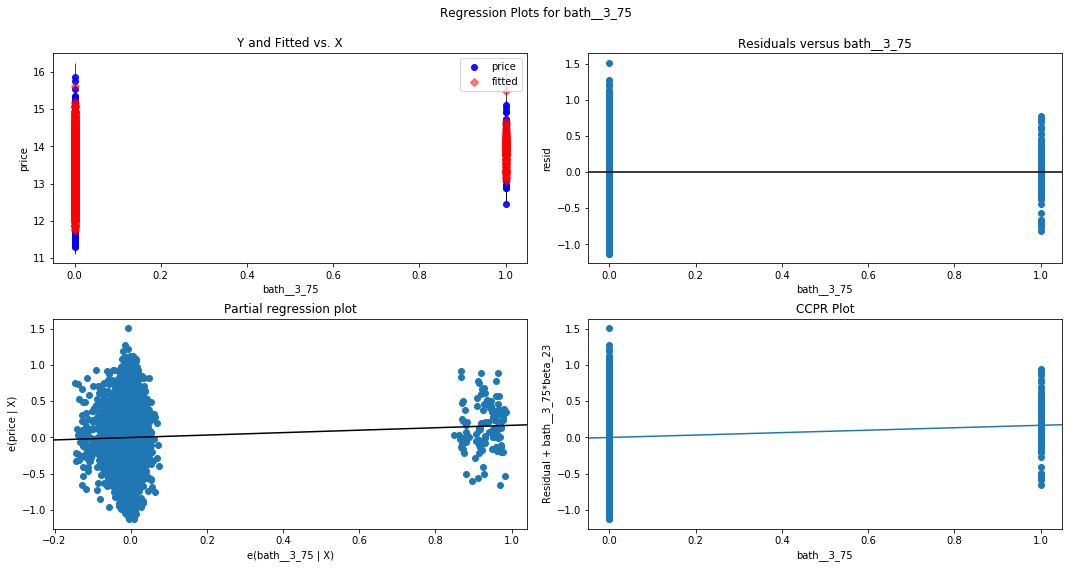

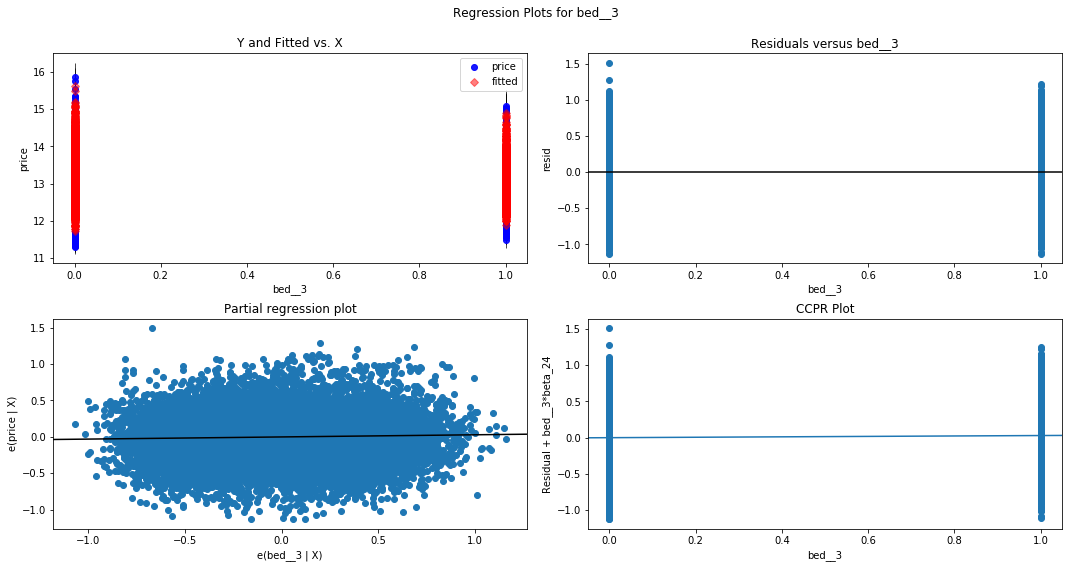

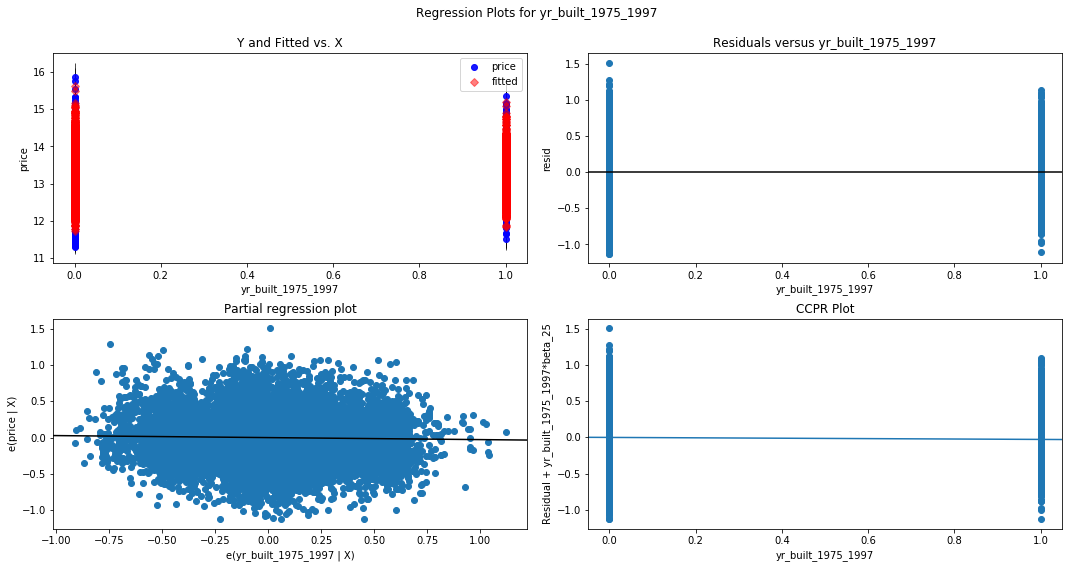

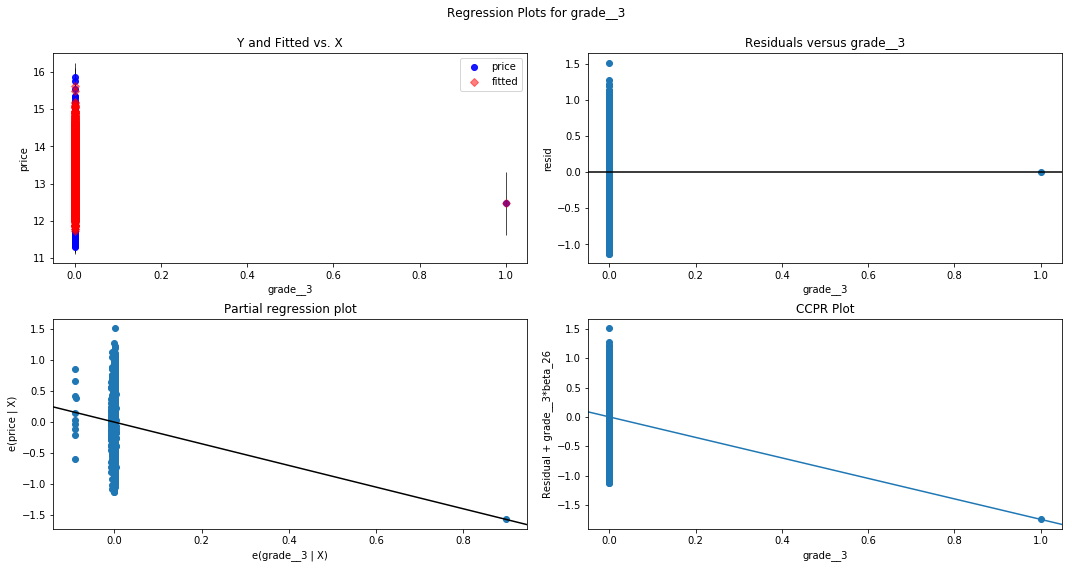

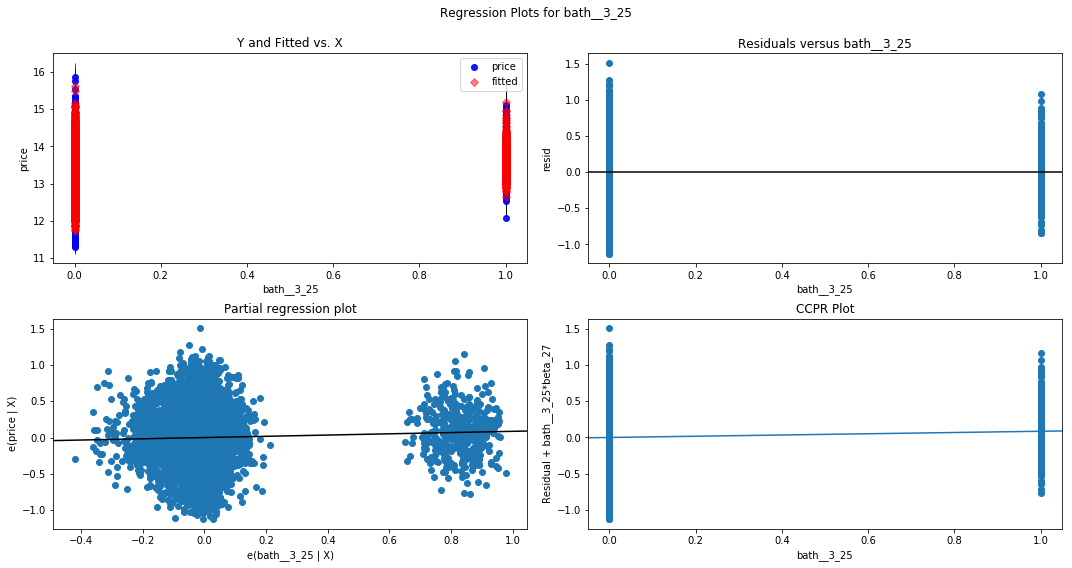

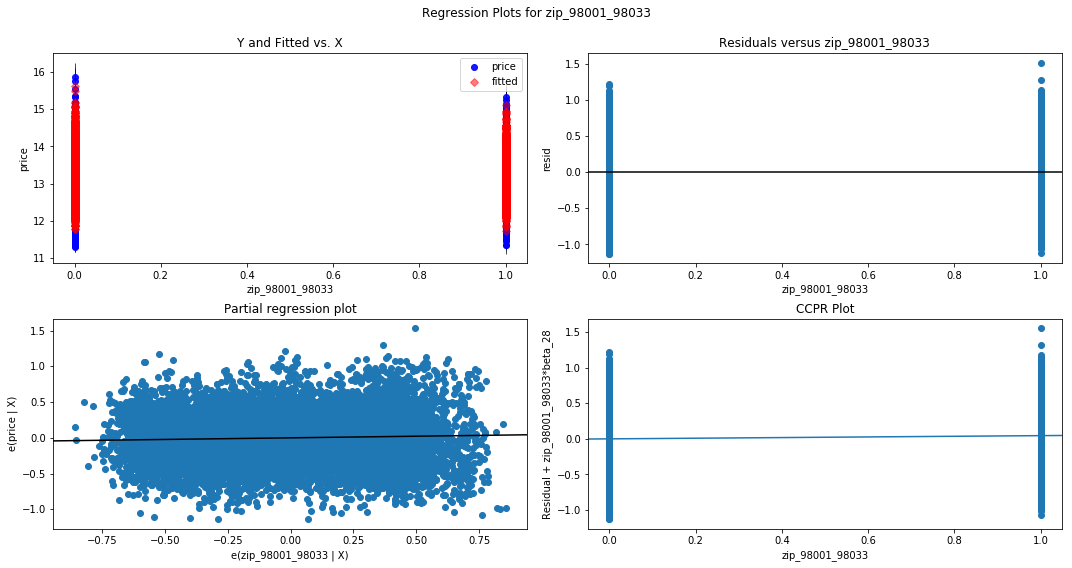

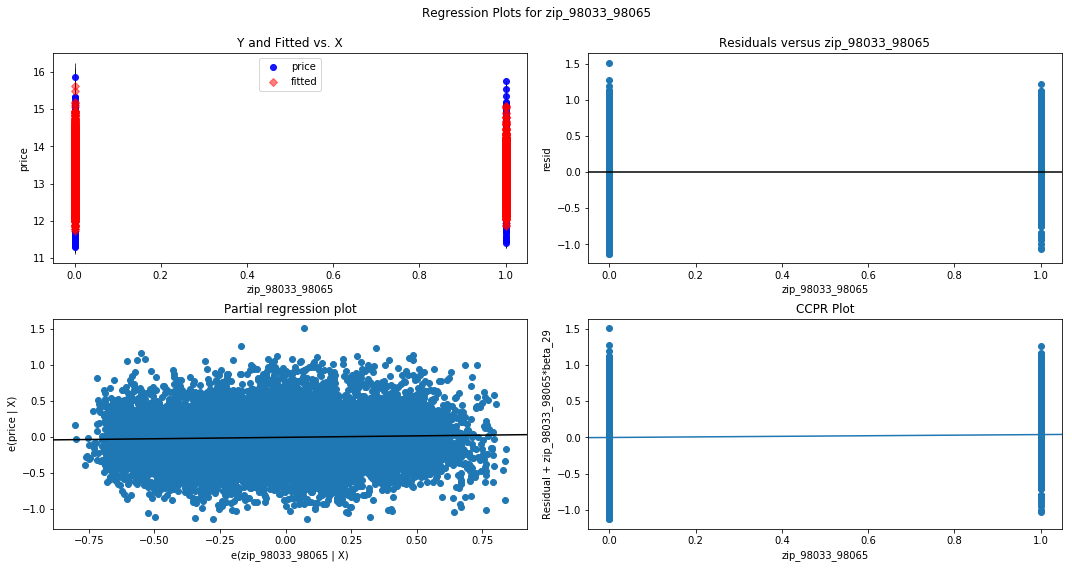

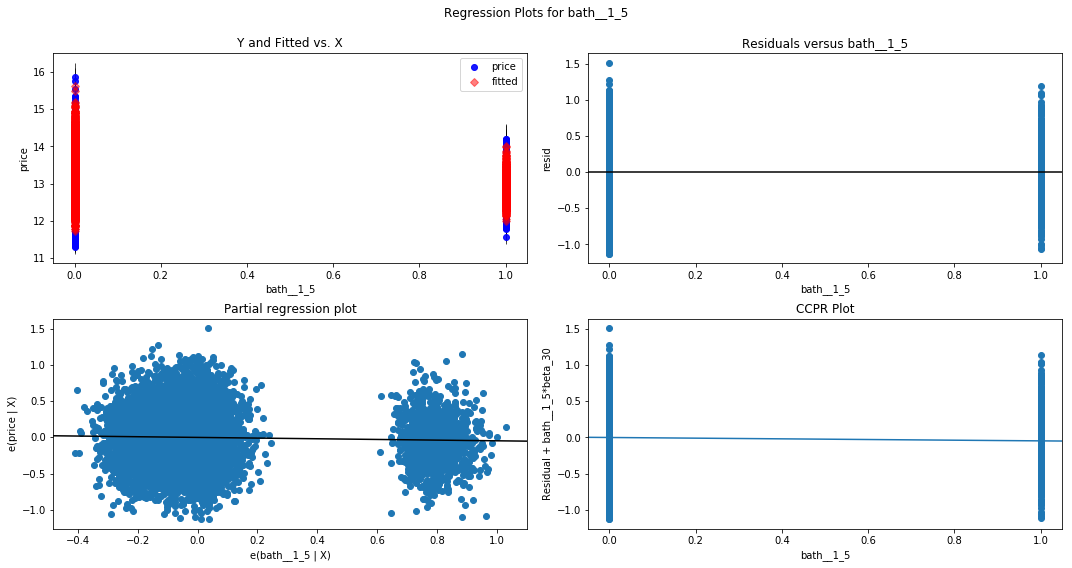

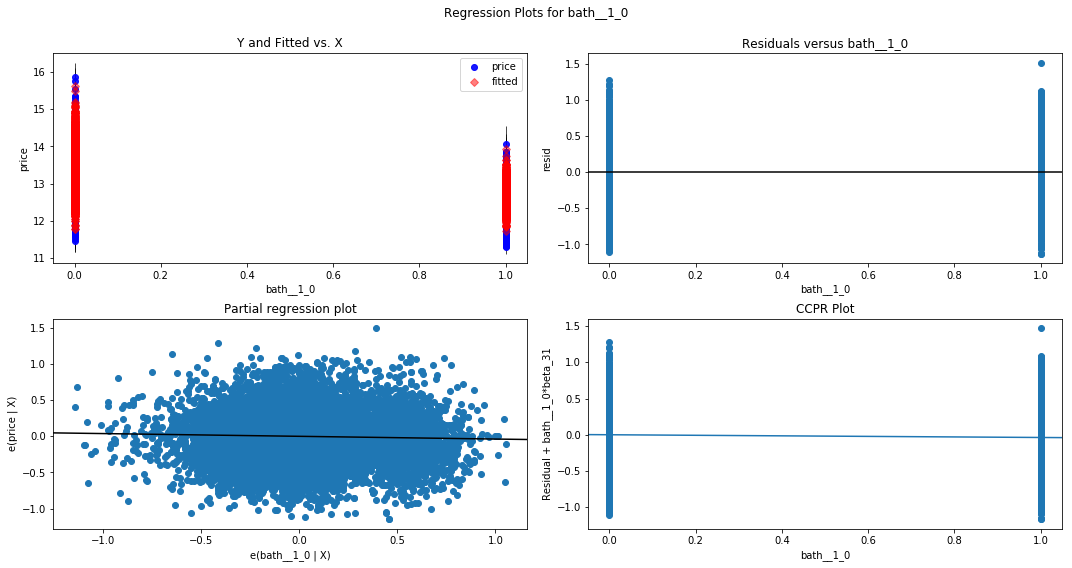

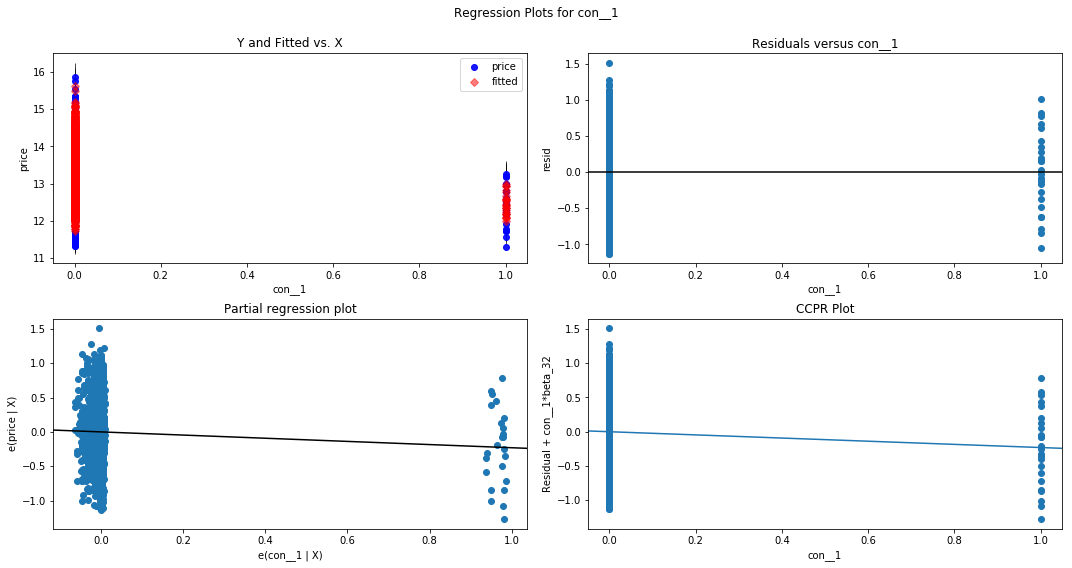

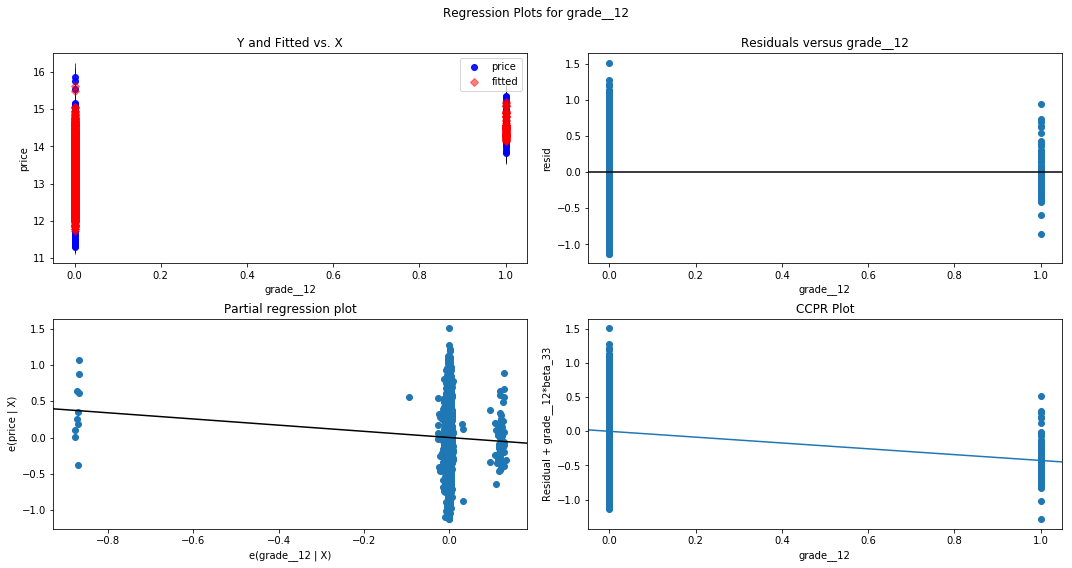

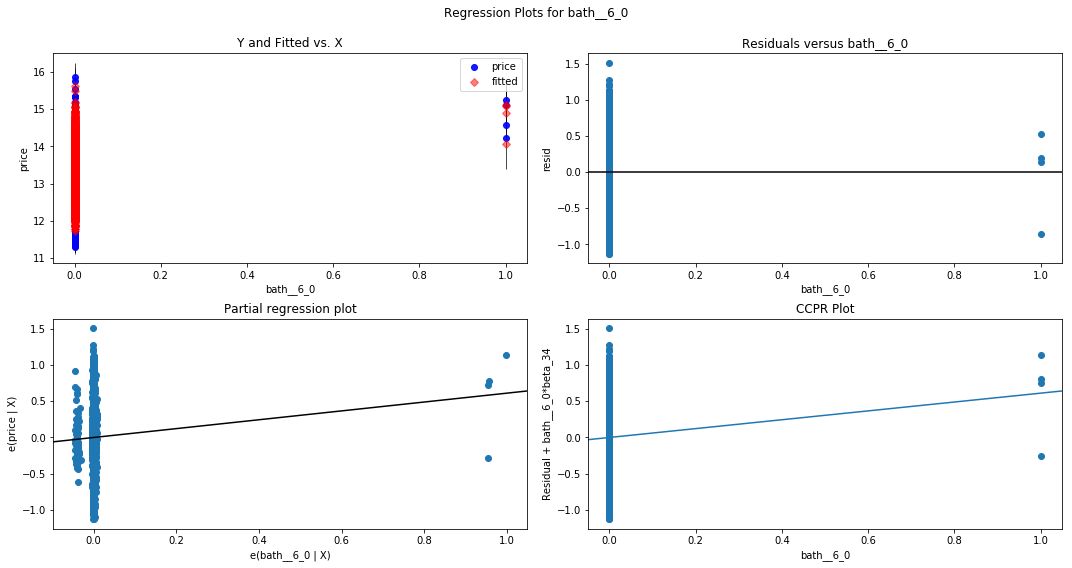

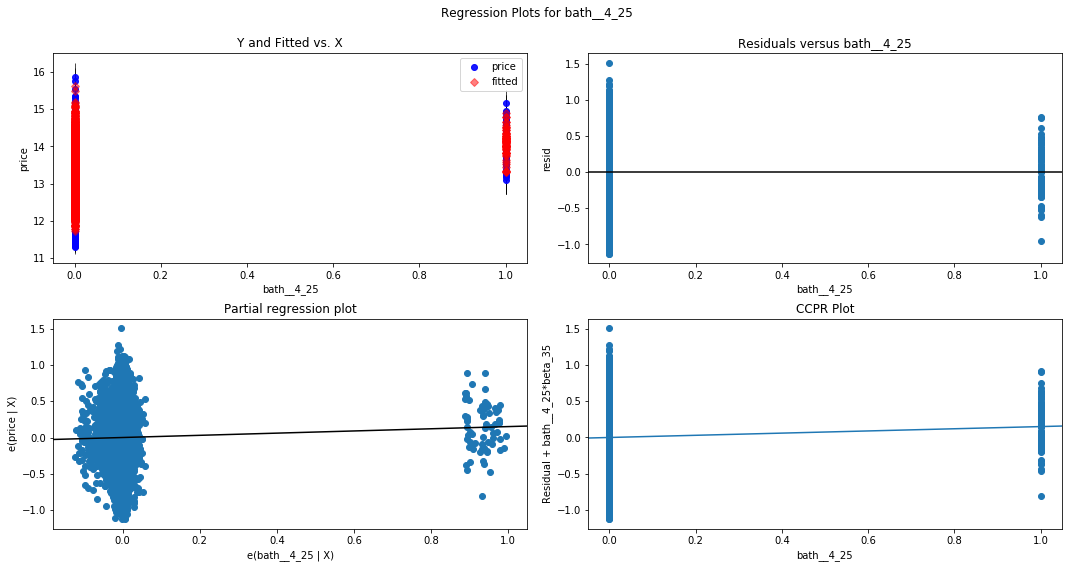

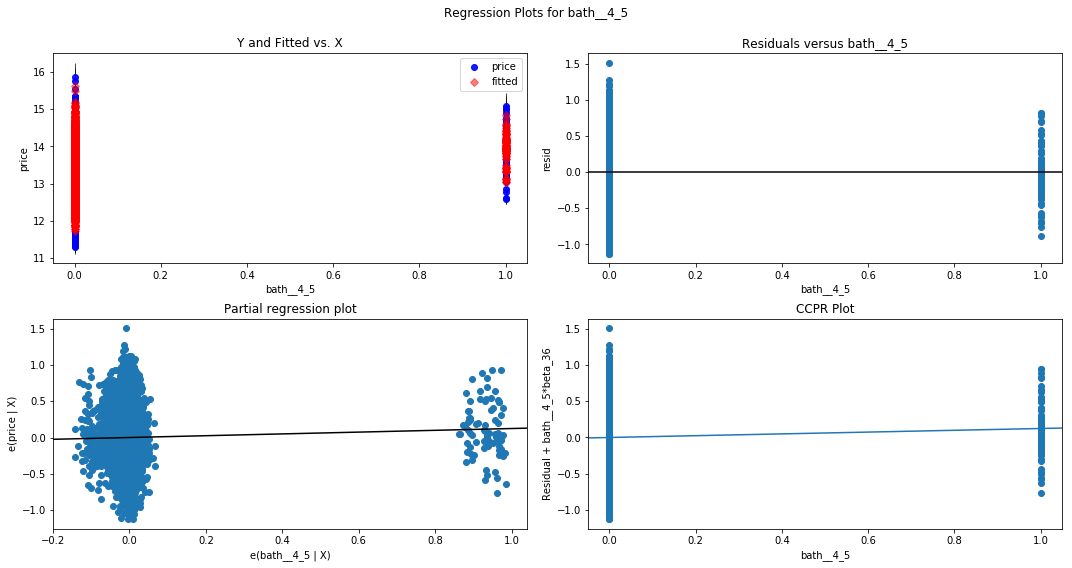

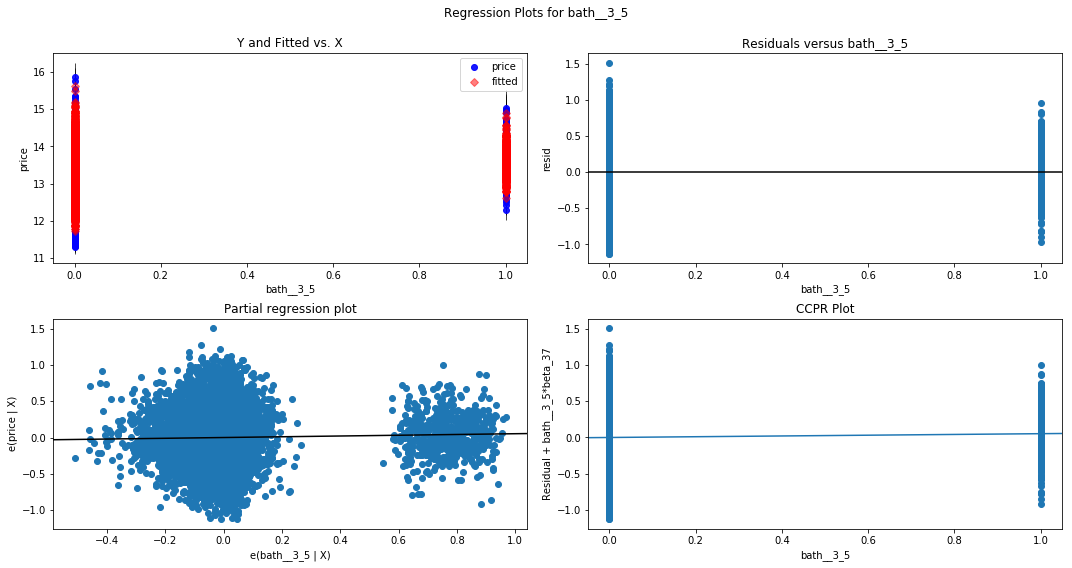

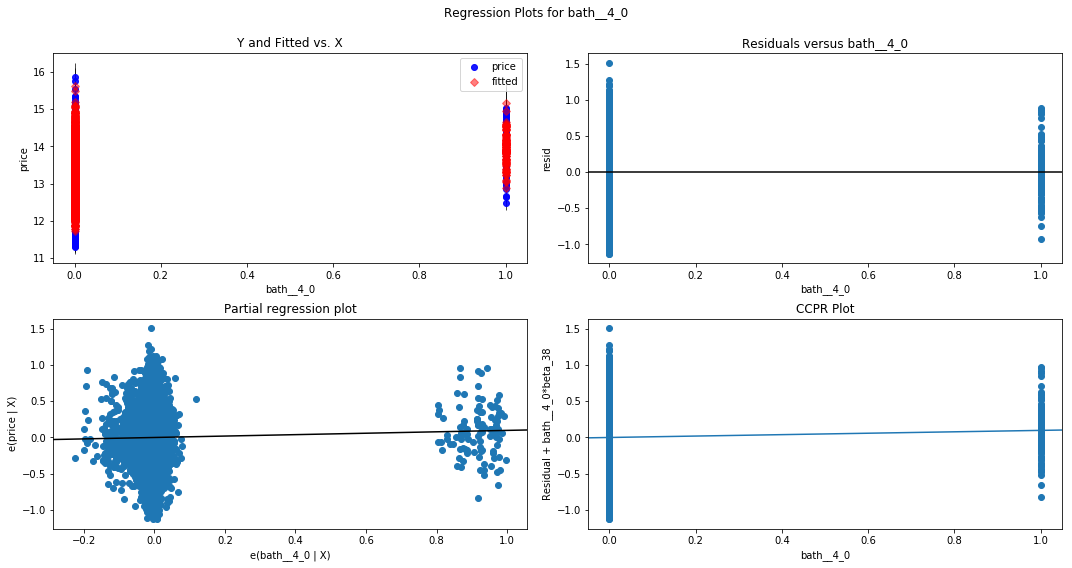

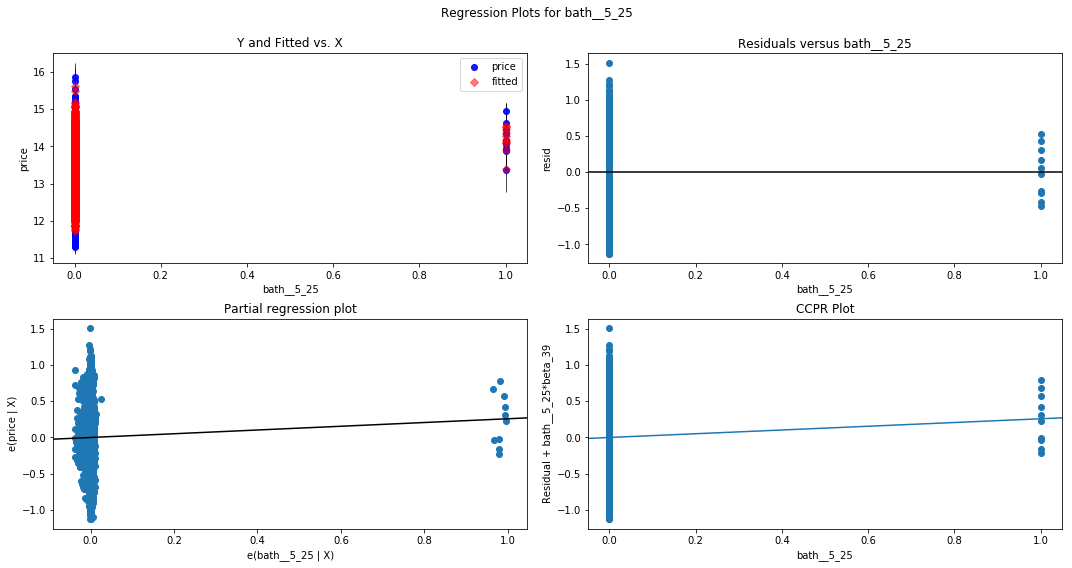

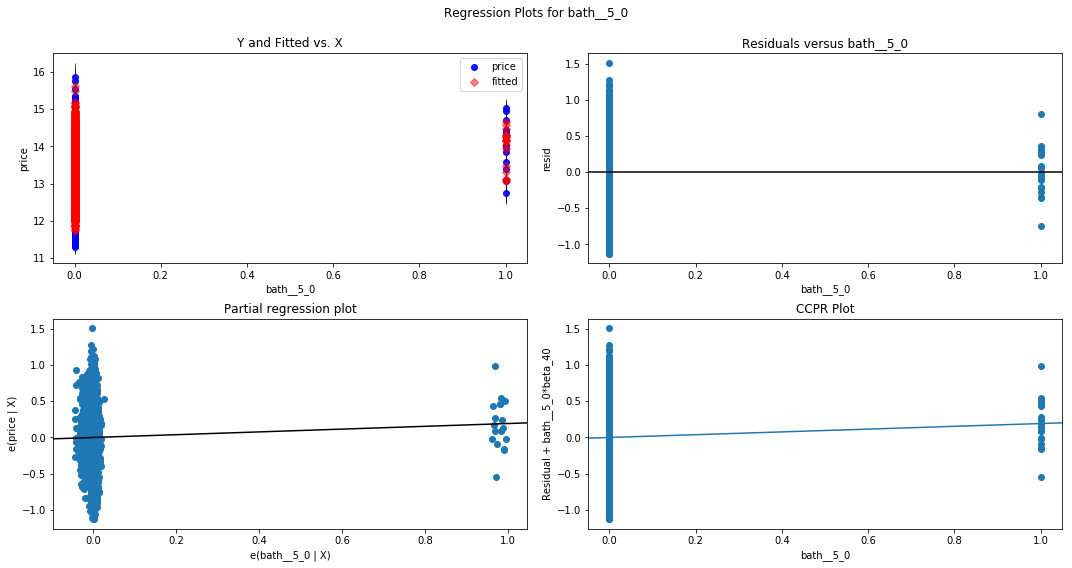

In [67]:
for column in X_train[select_features]:
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, X_train[column].name, fig=fig)
    plt.show()

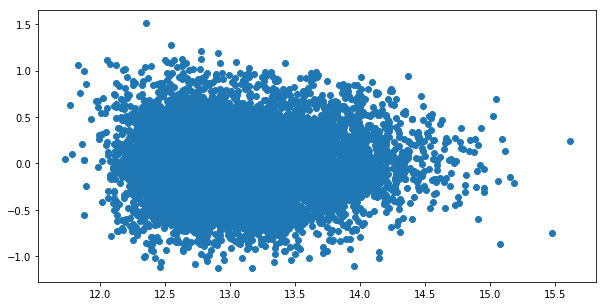

In [68]:
pred_val = model.fittedvalues.copy()
true_val = y_train.values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(10,5))
_ = ax.scatter(pred_val, residual)

Still noticing a few major outliers that could be affecting the quality of the model, even though data points outside of three standard deviations were removed. 

### Verifying homoscedasticiy with Goldfeld-Quandt test

In [69]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

features_int = sm.add_constant(X_train[select_features])
results = sm.OLS(y_train,features_int).fit()


name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

C:\Users\akell\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[('F statistic', 1.0147150013696944), ('p-value', 0.2491285148061889)]

Having a p-value greater than .05 indicates the residuals are not so great as to be significant, which is what we want.

## Interpretation

### Examine Coefficients

In [70]:
err_series = model.params - model.conf_int()[0] #Calculating confidence interval

In [71]:
coef_df = pd.DataFrame({'coef': model.params.values[1:], #Create a dataframe with relevant information
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-1.763792,0.193226,grade__6
1,0.454278,0.023030,sqft_living
2,0.324256,0.018454,yr_built_1900_1951
3,-1.513595,0.191948,grade__7
4,-1.283475,0.191420,grade__8
5,-1.925501,0.198226,grade__5
6,-1.033218,0.191096,grade__9
7,0.146762,0.013010,zip_98065_98118
8,-0.539065,0.056151,wf__0_0
9,0.107315,0.018138,yr_built_1951_1975


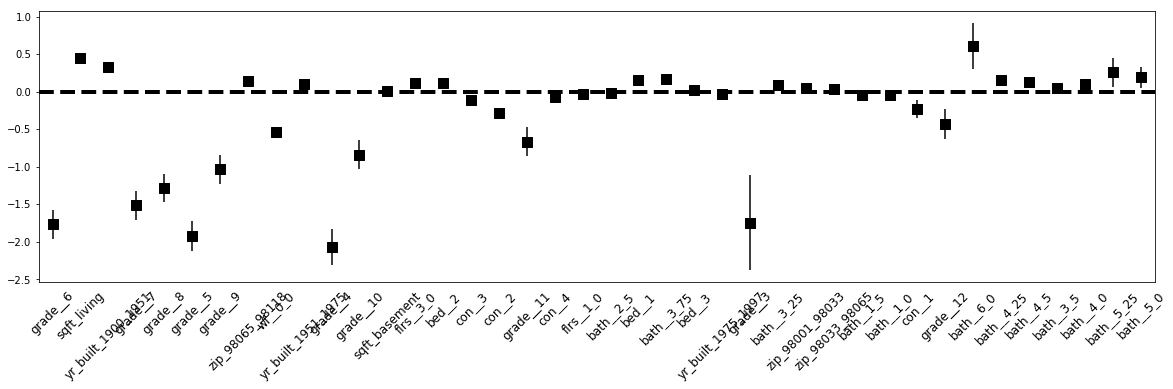

In [72]:
fig, ax = plt.subplots(figsize=(20, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(select_features, 
                       rotation=45, fontsize=12) #plotting chart to examine the distribution of positive and negative affects of each feature

In [73]:
coefs_with_var = dict(zip(err_series.index.values[1:], model.params.values[1:]))
log_var_coefs = dict({'sqft_basement':0.005362, 'sqft_living':0.454278})
del coefs_with_var['sqft_living']
del coefs_with_var['sqft_basement']
for key, val in sorted(coefs_with_var.items()):
    if val < 0:
        print(f"One unit increase in {key} is associated with a {val * 100} percent decrease in selling price.")
    else:
        print(f"One unit increase in {key} is associated with a {val * 100} percent increase in selling price.") 
        
for key,val in log_var_coefs.items():
    print(f"Ten percent increase in {key} is associated with a {val*10} percent increase in price.")

One unit increase in bath__1_0 is associated with a -3.785243139720604 percent decrease in selling price.
One unit increase in bath__1_5 is associated with a -4.678517586433212 percent decrease in selling price.
One unit increase in bath__2_5 is associated with a -2.3020494834594563 percent decrease in selling price.
One unit increase in bath__3_25 is associated with a 8.593678465970314 percent increase in selling price.
One unit increase in bath__3_5 is associated with a 5.254797665509775 percent increase in selling price.
One unit increase in bath__3_75 is associated with a 16.81936805399048 percent increase in selling price.
One unit increase in bath__4_0 is associated with a 9.803522434466212 percent increase in selling price.
One unit increase in bath__4_25 is associated with a 15.064861020556524 percent increase in selling price.
One unit increase in bath__4_5 is associated with a 12.414766342442624 percent increase in selling price.
One unit increase in bath__5_0 is associated w

## Summary

According to model and feature selection, bathrooms have a large affect on selling price, namely that fewer bathrooms lead to a lower selling price. The threshold for earning is more than two bathrooms. Contractors should look for homes with two bathrooms at minimum and consider adding at least one bathroom.

Just the sheer fact that the home has a bedroom at all increases price, and the effect on price diminishes as bedrooms are added which seems counter-intuitive. 

Houses with higher condition grade ratings mitigate the negative effect on sale price. There seems to be no positive correlation of condition with price or grade which can indicate better ratings don't necessarily raise price but poor ratings have a largely negative effect on price. 

More floors indicate higher selling prices with three floors having the most positive impact and only one floor having a negative impact. It's not clear whether basements are considered floors or not.

Properties that are not along the waterfront sell for less.

Early 20th century homes sold for higher prices than mid, and more recent homes sold for the lowest of the three groups of years. 

Zip codes between 98065 and 98118 had the largest effect on housing price.

The square footage of the basement seemed to have a small effect on housing price, though that may have to do with the fact that the column contained many zeroes. This can be interpreted that the sheer fact of having a basement increases housing price. 

Larger homes have higher selling prices. 

### Suggestions:
 * Buy homes with at least two bathrooms and increase by 1.
 * Utilize basement space to add bedrooms and bathrooms.
 * Purchase early 20th century homes to flip. 
 * Identify factors causing lower condition and grade levels and improve.
 * Purchase homes with zip codes between 98065 and 98118. 

## Future Work

There are many options for preparation of data that can be explored such as:
   * One-hot encode zip codes to identify which areas have highest increase in price. 
   * Break years built into smaller bins, possibly by decade. 
   * Mitigate effects of outliers by removing datapoints beyond the 95th percentile. 
   * Experiment with rounded bathrooms to the nearest half-bath as per industry standards.
   * One-hot encode basement information into whether the home has a basement or not to measure the impact of the sheer nature of properties containing basements. 
    
The improvement of the model can be investigated by:
   * The previously defined data preparation
   * Reduction in number of categorical variables
   * A more intuitive approach to feature selection
        * Certain levels of categorical features were left out of the final model which may have an effect on our understanding of the relationship between those levels and the included levels
        * As our stakeholders for the chosen business proposal are contractors who flip homes, certain unchangeable features can most likely be ignored such as zip code or year built. 
        
Things to note:
   * Features were selected from a group with dropped categorical features, so their effects were not measured. My understanding of feature selection as per the curriculum is that this was the appropriate way to handle feature selection. Clarity is needed as to whether this is true. 
    * Clarity is also needed for the interpretation of categorical variables. Because each level is measured individually, many zeros remain in each column which seems to have an adverse effect on the model. This also has an impact on the categorical variable as a whole, because it is not treated as a whole.
    * The data set is EXTREMELY limited, so I would not trust this model. There are many factors related to housing prices such as school zones, proximity to airports (noise levels), tax rates, proximity to highways/public transportation, etc. 
    * The business proposal contains a blindspot. As a contractor who flips homes, you not only have to measure which elements effect selling price, but also which elements optimize the initial value of the home before it's renovated. Both purchase price AND selling price should be investigated in two separate feature sets to be considered for the model. 
        

______________________________________________________________________________________________________________
Ignore below this line.

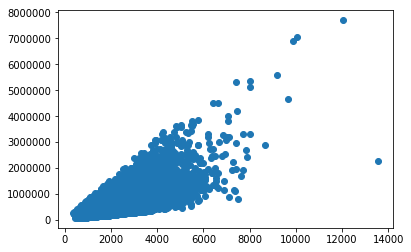

In [74]:
plt.scatter(original_df.sqft_living, original_df.price)
plt.show()

In [79]:
original_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')